# 2. Análisis Exploratorio de Datos


El Análisis Exploratorio se realiza con dos datasets previamente transformados, donde uno contiene los datos limpios originales y el otro los datos codificados.

Se ha realizado manejo de nulos en el dataset, además de codificación de variables categóricas y estandarización de preguntas y respuestas para obtener un dataset en un solo idioma (español).

Se busca explorar los datos de consumo de sustancias psicoactivas (SPA), al igual que las experiencias positivas y negativas que han tenido los participantes segun su perfil. Esto ayudará a identificar patrones de consumo con el fin de entrenar un modelo para predecir el nivel de riesgo de un tratamiento con SPA basado en el perfil del individuo.


### Importaciones y Carga de Datos


In [219]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Leer el df_clean con variables categóricas y el df_clean con variables codificadas
df_clean = pd.read_csv('encuestas/encuesta_limpia.csv')
df_encoded = pd.read_csv('encuestas/encuesta_codificada.csv')

In [221]:
df_clean.head(3)

,Residencia,Edad,Sexo,Frecuencia Cannabis,Frecuencia Psilocibina,Frecuencia MDMA,Propósito Cannabis,Propósito Psilocibina,Propósito MDMA,Tipo Experiencia Cannabis,Tipo Experiencia Psilocibina,Tipo Experiencia MDMA,Dependencia Cannabis,Dependencia Psilocibina,Dependencia MDMA,Abuso Cannabis,Abuso Psilocibina,Abuso MDMA,Terapia Convencional,Cantidad Tratamientos,Sustancia Tratamiento,Tipo de Dosis,Sesiones Macrodosis,Duración Microdosis,Calificación Tratamiento,Validacion Sustancia Tratamiento,Historial Familiar_Adicción Juegos o Apuestas,Historial Familiar_Adicción Nicotina,Historial Familiar_Adicción Sustancias Sintenticas o Drogas Ilegales,Historial Familiar_Adicción Medicamentos Recetados,Historial Familiar_Adicción Alcohol,Historial Familiar_Demencia con cuerpos de Lewy,Historial Familiar_Enfermedad de Alzheimer,Historial Familiar_Epilepsia,Historial Familiar_Esquizofrenia,Historial Familiar_Sin Condición Relevante,Historial Familiar_Otros,Historial Familiar_Sin Dato,"Historial Familiar_Trastorno Bipolar (I , II)",Historial Familiar_Psicosis/Paranoia,Historial Familiar_Trastorno Depresivo Mayor o Persistente,Historial Familiar_Trastorno de Ansiedad Generalizada (TAG),Historial Familiar_Trastorno esquizoafectivo,Condición_Adicción Juegos o Apuestas,Condición_Adicción Nicotina,Condición_Adicción Sustancias Sintenticas o Drogas Ilegales,Condición_Adicción Medicamentos Recetados,Condición_Adicción Alcohol,Condición_Epilepsia,Condición_Esquizofrenia,Condición_Sin Condición Relevante,Condición_Otros,Condición_Sin Dato,"Condición_Trastorno Bipolar (I , II)",Condición_Trastorno Depresivo Mayor o Persistente,Condición_Psicosis/Paranoia,Condición_Trastorno de Ansiedad Generalizada (TAG),Condición_Trastorno esquizoafectivo,Sustancias Vida_2CB / Tussi,Sustancias Vida_Alcohol,Sustancias Vida_Cannabis,Sustancias Vida_Cocaína,Sustancias Vida_DMT,Sustancias Vida_Psilocibina,Sustancias Vida_LSD,Sustancias Vida_MDMA,Sustancias Vida_Magic Mushrooms,Sustancias Vida_Nicotina,Sustancias Vida_Otros,Sustancias Vida_Popper,Sustancias Frecuente_2CB / Tussi,Sustancias Frecuente_Alcohol,Sustancias Frecuente_Cannabis,Sustancias Frecuente_Cocaína,Sustancias Frecuente_DMT,Sustancias Frecuente_Psilocibina,Sustancias Frecuente_LSD,Sustancias Frecuente_MDMA,Sustancias Frecuente_Magic Mushrooms,Sustancias Frecuente_Nicotina,Sustancias Frecuente_Otros,Sustancias Frecuente_Popper,Sustancias Frecuente_Sin Dato,Efectos Positivos Cannabis_Alivio Dolores Crónicos,Efectos Positivos Cannabis_Aumento Apetito,Efectos Positivos Cannabis_Aumento Creatividad,Efectos Positivos Cannabis_Mejora Sueño,Efectos Positivos Cannabis_Mejora Estado de Animo,Efectos Positivos Cannabis_Mejora Introspección,Efectos Positivos Cannabis_Sin Efecto Positivo,Efectos Positivos Cannabis_Otros,Efectos Positivos Cannabis_Reducción Ansiedad,Efectos Positivos Cannabis_Reducción Inflamacion o Espasmos,Efectos Positivos Cannabis_Sin Dato,Efectos Negativos Cannabis_Aislamiento,Efectos Negativos Cannabis_Falta Apetito,Efectos Negativos Cannabis_Sin Efecto Negativo,Efectos Negativos Cannabis_Otros,Efectos Negativos Cannabis_Problemas cognitivos,Efectos Negativos Cannabis_Problemas Memoria o Atención,Efectos Negativos Cannabis_Problemas respiratorios,Efectos Negativos Cannabis_Psicosis,Efectos Negativos Cannabis_Sin Dato,Efectos Negativos Cannabis_Trastornos del sueño,Efectos Positivos Psilocibina_Alivio Dolores Crónicos,Efectos Positivos Psilocibina_Aumento Apetito,Efectos Positivos Psilocibina_Mejora Introspección,Efectos Positivos Psilocibina_Mayor Satisfacción con la Vida,Efectos Positivos Psilocibina_Mejora Sueño,Efectos Positivos Psilocibina_Sin Efecto Positivo,Efectos Positivos Psilocibina_Otros,Efectos Positivos Psilocibina_Reducción Ansiedad,Efectos Positivos Psilocibina_Reducción Sintomas Depresión,Efectos Positivos Psilocibina_Sin Dato,Efectos Negativos Psilocibina_Cambios de humor,Efectos Negativos Psilocibina_Intoxicación,Efectos Negativos Psilocibina_Sin Efecto Negativo,Efectos Negativos

In [222]:
df_encoded.head(3)

,Frecuencia Cannabis,Frecuencia Psilocibina,Frecuencia MDMA,Dependencia Cannabis,Dependencia Psilocibina,Dependencia MDMA,Abuso Cannabis,Abuso Psilocibina,Abuso MDMA,Cantidad Tratamientos,Sesiones Macrodosis,Duración Microdosis,Calificación Tratamiento,Historial Familiar_Adicción Juegos o Apuestas,Historial Familiar_Adicción Nicotina,Historial Familiar_Adicción Sustancias Sintenticas o Drogas Ilegales,Historial Familiar_Adicción Medicamentos Recetados,Historial Familiar_Adicción Alcohol,Historial Familiar_Demencia con cuerpos de Lewy,Historial Familiar_Enfermedad de Alzheimer,Historial Familiar_Epilepsia,Historial Familiar_Esquizofrenia,Historial Familiar_Sin Condición Relevante,Historial Familiar_Otros,Historial Familiar_Sin Dato,"Historial Familiar_Trastorno Bipolar (I , II)",Historial Familiar_Psicosis/Paranoia,Historial Familiar_Trastorno Depresivo Mayor o Persistente,Historial Familiar_Trastorno de Ansiedad Generalizada (TAG),Historial Familiar_Trastorno esquizoafectivo,Condición_Adicción Juegos o Apuestas,Condición_Adicción Nicotina,Condición_Adicción Sustancias Sintenticas o Drogas Ilegales,Condición_Adicción Medicamentos Recetados,Condición_Adicción Alcohol,Condición_Epilepsia,Condición_Esquizofrenia,Condición_Sin Condición Relevante,Condición_Otros,Condición_Sin Dato,"Condición_Trastorno Bipolar (I , II)",Condición_Trastorno Depresivo Mayor o Persistente,Condición_Psicosis/Paranoia,Condición_Trastorno de Ansiedad Generalizada (TAG),Condición_Trastorno esquizoafectivo,Sustancias Vida_2CB / Tussi,Sustancias Vida_Alcohol,Sustancias Vida_Cannabis,Sustancias Vida_Cocaína,Sustancias Vida_DMT,Sustancias Vida_Psilocibina,Sustancias Vida_LSD,Sustancias Vida_MDMA,Sustancias Vida_Magic Mushrooms,Sustancias Vida_Nicotina,Sustancias Vida_Otros,Sustancias Vida_Popper,Sustancias Frecuente_2CB / Tussi,Sustancias Frecuente_Alcohol,Sustancias Frecuente_Cannabis,Sustancias Frecuente_Cocaína,Sustancias Frecuente_DMT,Sustancias Frecuente_Psilocibina,Sustancias Frecuente_LSD,Sustancias Frecuente_MDMA,Sustancias Frecuente_Magic Mushrooms,Sustancias Frecuente_Nicotina,Sustancias Frecuente_Otros,Sustancias Frecuente_Popper,Sustancias Frecuente_Sin Dato,Efectos Positivos Cannabis_Alivio Dolores Crónicos,Efectos Positivos Cannabis_Aumento Apetito,Efectos Positivos Cannabis_Aumento Creatividad,Efectos Positivos Cannabis_Mejora Sueño,Efectos Positivos Cannabis_Mejora Estado de Animo,Efectos Positivos Cannabis_Mejora Introspección,Efectos Positivos Cannabis_Sin Efecto Positivo,Efectos Positivos Cannabis_Otros,Efectos Positivos Cannabis_Reducción Ansiedad,Efectos Positivos Cannabis_Reducción Inflamacion o Espasmos,Efectos Positivos Cannabis_Sin Dato,Efectos Negativos Cannabis_Aislamiento,Efectos Negativos Cannabis_Falta Apetito,Efectos Negativos Cannabis_Sin Efecto Negativo,Efectos Negativos Cannabis_Otros,Efectos Negativos Cannabis_Problemas cognitivos,Efectos Negativos Cannabis_Problemas Memoria o Atención,Efectos Negativos Cannabis_Problemas respiratorios,Efectos Negativos Cannabis_Psicosis,Efectos Negativos Cannabis_Sin Dato,Efectos Negativos Cannabis_Trastornos del sueño,Efectos Positivos Psilocibina_Alivio Dolores Crónicos,Efectos Positivos Psilocibina_Aumento Apetito,Efectos Positivos Psilocibina_Mejora Introspección,Efectos Positivos Psilocibina_Mayor Satisfacción con la Vida,Efectos Positivos Psilocibina_Mejora Sueño,Efectos Positivos Psilocibina_Sin Efecto Positivo,Efectos Positivos Psilocibina_Otros,Efectos Positivos Psilocibina_Reducción Ansiedad,Efectos Positivos Psilocibina_Reducción Sintomas Depresión,Efectos Positivos Psilocibina_Sin Dato,Efectos Negativos Psilocibina_Cambios de humor,Efectos Negativos Psilocibina_Intoxicación,Efectos Negativos Psilocibina_Sin Efecto Negativo,Efectos Negativos Psilocibina_Otros,Efectos Negativos Psilocibina_Problemas Memoria o Atención,Efectos Negativos Psilocibina_Psicosis,Efectos Negativos Psilocibina_Sin Dato,Efectos Positivos MDMA_Alivio Dolores Crónicos,Efectos Positivos MDMA_Aumento Empatía,Ef

### Definición de Variables y Parámetros


In [223]:
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_colwidth', None)


# pd.reset_option("all")


In [224]:
# Sustancias utilizadas en el estudio
sustancias_estudio = ['Psilocibina', 'Cannabis', 'MDMA']

# Orden de la frecuencia de consumo
orden_frecuencias = ['Diario', 'Varias veces a la semana', 'Cada semana', 'Varias veces al mes', 'Cada mes', 'Varias veces al año', 'Cada año']

# Paleta de colores
colors = ['#FFB3BA', '#FFDFBA', '#BAFFC9', '#BAE1FF', 
          '#FFCCE5', '#D4A5A5', '#C7CEEA', '#FFC1A1', '#FFDAC1', 
          '#B5EAD7', '#E2F0CB']

razones_tratamiento = [col for col in df_clean.columns if 'Razón Tratamiento' in col and col != 'Sin Dato']


## Exploración Inicial de los Datos


In [225]:
# Descripción de variables categoricas
df_clean.describe(include='object')

,Residencia,Edad,Sexo,Frecuencia Cannabis,Frecuencia Psilocibina,Frecuencia MDMA,Propósito Cannabis,Propósito Psilocibina,Propósito MDMA,Tipo Experiencia Cannabis,Tipo Experiencia Psilocibina,Tipo Experiencia MDMA,Terapia Convencional,Cantidad Tratamientos,Sustancia Tratamiento,Tipo de Dosis,Sesiones Macrodosis,Duración Microdosis,Validacion Sustancia Tratamiento
count,261,261,261,261,261,261,261,261,261,261,261,261,62,261,261,261,261,261,261
unique,13,42,3,8,7,7,4,4,4,4,4,4,2,4,10,5,5,5,3
top,Colombia,22,Masculino,Sin Dato,Sin Dato,Sin Dato,Fines recreativos,Sin Dato,Sin Dato,Experiencia independiente,Sin Dato,Sin Dato,Exitosa,Sin Dato,Sin Dato,Sin Dato,Sin Dato,Sin Dato,Sin Dato
freq,225,26,153,61,143,183,104,132,172,135,136,203,40,156,163,146,188,206,250


In [226]:
# Descripción de variables numericas
df_clean.describe()

,Calificación Tratamiento,Efectos Negativos MDMA_Sin Efecto Negativo
count,261.000000,261.000000
mean,1.862069,0.103448
std,2.264300,0.305129
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,5.000000,0.000000
max,5.000000,1.000000


## Descripción de la Muestra


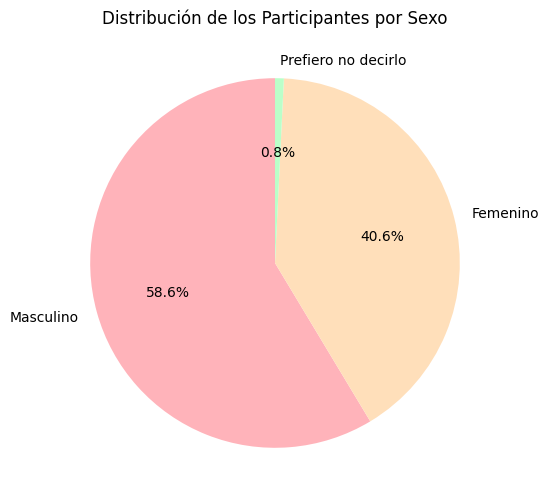

In [227]:
plt.figure(figsize=(10, 6))
df_clean['Sexo'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Distribución de los Participantes por Sexo")
plt.ylabel("")
plt.show()

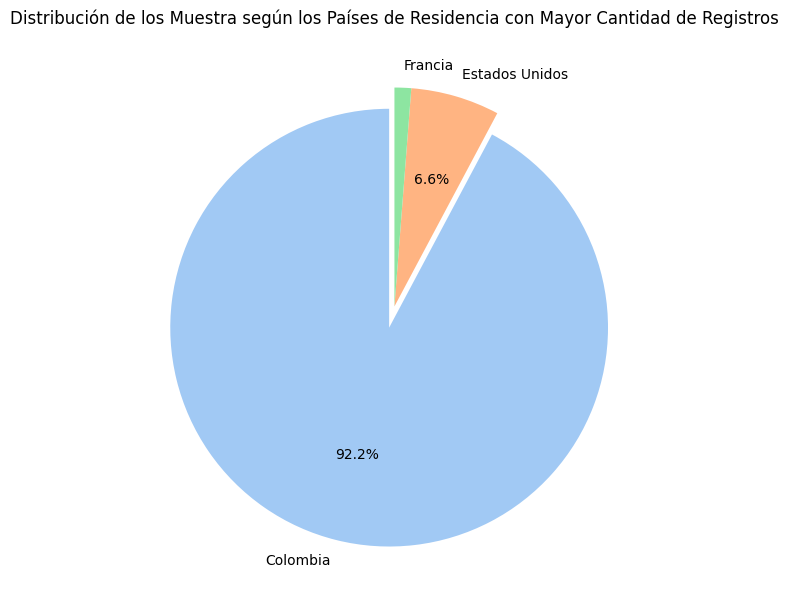

In [228]:
top_countries = df_clean['Residencia'].value_counts().nlargest(3)

plt.figure(figsize=(10, 6))
explode = [0.1 if i == top_countries.idxmax() else 0 for i in top_countries.index] 
top_countries.plot(
    kind='pie',
    autopct=lambda pct: f'{pct:.1f}%' if pct > 5 else '', 
    colors=sns.color_palette("pastel"),
    startangle=90,
    explode=explode,
    labels=top_countries.index
)
plt.title("Distribución de los Muestra según los Países de Residencia con Mayor Cantidad de Registros")
plt.ylabel("") 
plt.tight_layout() 
plt.show()


/var/folders/h9/bqqwl8l10jb5klwskmyw_0r40000gn/T/ipykernel_69483/1397872119.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/h9/bqqwl8l10jb5klwskmyw_0r40000gn/T/ipykernel_69483/1397872119.py:4: UserWarning: 
The palette list has fewer values (11) than needed (30) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


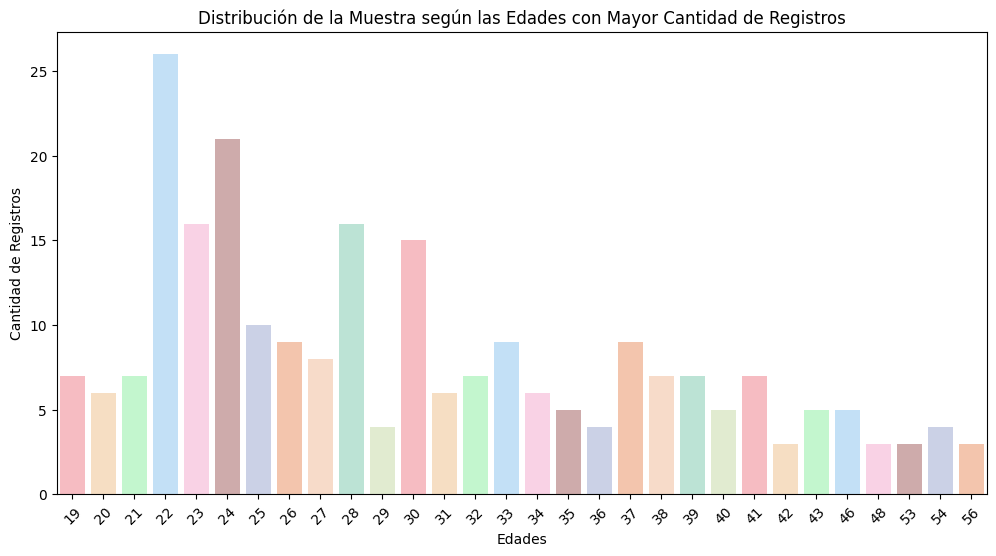

In [229]:
top_ages = df_clean['Edad'].value_counts().nlargest(30)

plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_ages.index.astype(int), 
    y=top_ages.values, 
    palette=colors
)
plt.title("Distribución de la Muestra según las Edades con Mayor Cantidad de Registros")
plt.xlabel("Edades")
plt.ylabel("Cantidad de Registros")
plt.xticks(rotation=45)  
plt.show()


## Análisis Exploratorio


#### Frecuencia de consumo de Cannabis y Psilocibina


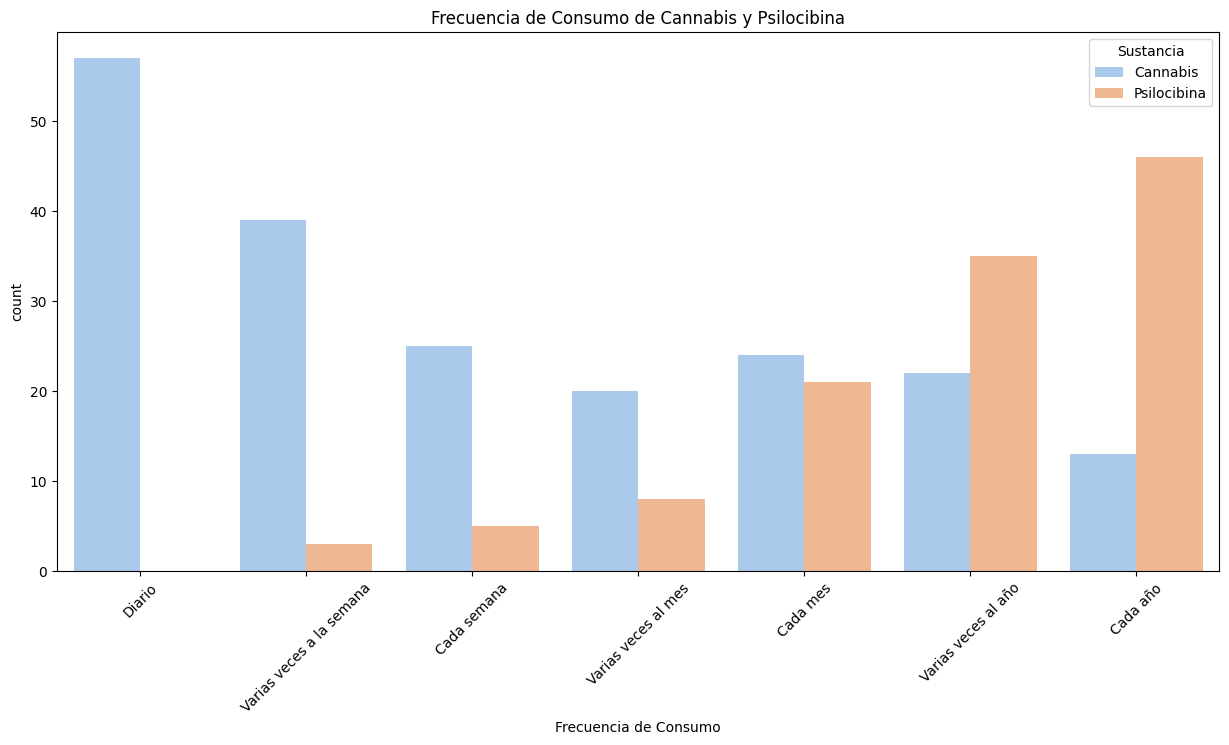

In [230]:
# Crear un DF filtrado para eliminar las filas 'Sin Dato' y mantener solo la columna de interés
df_filtrado_frecuencia_cannabis = df_clean[df_clean['Frecuencia Cannabis'] != 'Sin Dato'][['Frecuencia Cannabis']]
df_filtrado_frecuencia_psilocibina = df_clean[df_clean['Frecuencia Psilocibina'] != 'Sin Dato'][['Frecuencia Psilocibina']]

# Renombrar las columnas y agregar columna para identificar la sustancia
df_filtrado_frecuencia_cannabis.columns = ['Frecuencia']
df_filtrado_frecuencia_psilocibina.columns = ['Frecuencia']

df_filtrado_frecuencia_cannabis['Sustancia'] = 'Cannabis'
df_filtrado_frecuencia_psilocibina['Sustancia'] = 'Psilocibina'

# Crear un nuevo DataFrame combinando las frecuencias de consumo de las dos sutancias
df_combined_freq_cannabis_psilocibina = pd.concat([
    df_filtrado_frecuencia_cannabis,
    df_filtrado_frecuencia_psilocibina
])

plt.figure(figsize=(15, 7))
sns.countplot(data=df_combined_freq_cannabis_psilocibina, x='Frecuencia', hue='Sustancia', palette='pastel', order=orden_frecuencias)

plt.title('Frecuencia de Consumo de Cannabis y Psilocibina')
plt.xticks(rotation=45)
plt.xlabel('Frecuencia de Consumo')
plt.legend(title='Sustancia', loc='upper right')

plt.show()

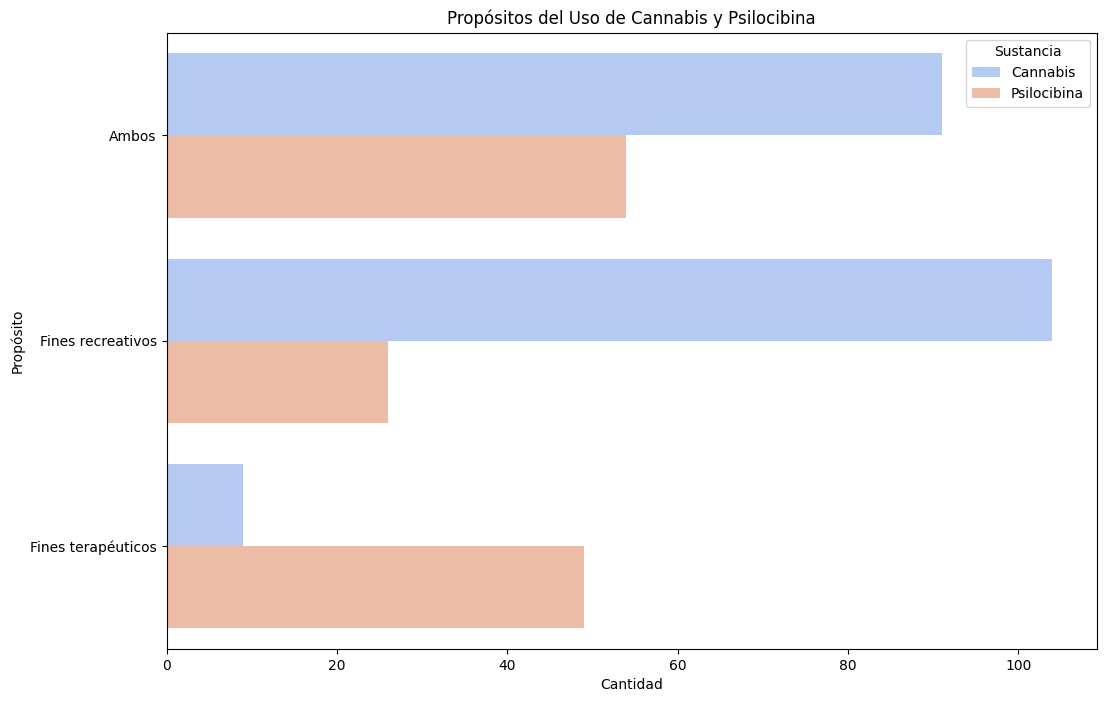

In [231]:
# Crear un DataFrame con ambos propósitos en un formato adecuado
df_cannabis = df_clean[df_clean["Propósito Cannabis"] != 'Sin Dato'][["Propósito Cannabis"]].rename(columns={"Propósito Cannabis": "Propósito"})
df_cannabis["Sustancia"] = "Cannabis"

df_psilocibina = df_clean[df_clean["Propósito Psilocibina"] != 'Sin Dato'][["Propósito Psilocibina"]].rename(columns={"Propósito Psilocibina": "Propósito"})
df_psilocibina["Sustancia"] = "Psilocibina"

# Concatenar ambos DataFrames
df_propositos = pd.concat([df_cannabis, df_psilocibina], ignore_index=True)

# Graficar la distribución de propósitos por sustancia
plt.figure(figsize=(12, 8))
sns.countplot(
    data=df_propositos,
    y="Propósito",
    hue="Sustancia",
    order=df_propositos["Propósito"].value_counts().index,
    palette="coolwarm"
)
plt.title("Propósitos del Uso de Cannabis y Psilocibina")
plt.xlabel("Cantidad")
plt.ylabel("Propósito")
plt.legend(title="Sustancia")
plt.show()


#### Porcentaje de personas que declararon dependencia a alguna de las sustancias del estudio


In [232]:
lista_sustancias = ['Cannabis', 'Psilocibina', 'MDMA', 'Alcohol']
lista_porcentajes = []

for sustancia in lista_sustancias:
    if sustancia == 'Alcohol':
        col_sustancia = 'Condición_Adicción ' + sustancia 
    else:
        col_sustancia = 'Dependencia ' + sustancia
    
    # Contar las personas que reportaron dependencia a las sustancias, y el total de personas
    dependencia_count = df_clean[(df_clean[col_sustancia] == 'Si') | (df_clean[col_sustancia] == True)][col_sustancia].count()
    total_count = df_clean[df_clean[col_sustancia] != 'Sin Dato'][col_sustancia].count()

    dependencia_porcentaje = round(((dependencia_count / total_count) * 100), 1)
    lista_porcentajes.append(dependencia_porcentaje)


# Crear un DF con los datos de dependencia
df_dependencia = pd.DataFrame({
    'Sustancia': lista_sustancias,
    'Porcentaje de Dependencia': lista_porcentajes
})

df_dependencia.sort_values(by='Porcentaje de Dependencia', ascending=False)

,Sustancia,Porcentaje de Dependencia
0,Cannabis,21.5
3,Alcohol,6.9
1,Psilocibina,0.8
2,MDMA,0.8


/var/folders/h9/bqqwl8l10jb5klwskmyw_0r40000gn/T/ipykernel_69483/2476939676.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_dependencia.sort_values(by='Porcentaje de Dependencia', ascending=False), x='Sustancia', y='Porcentaje de Dependencia', palette='pastel')


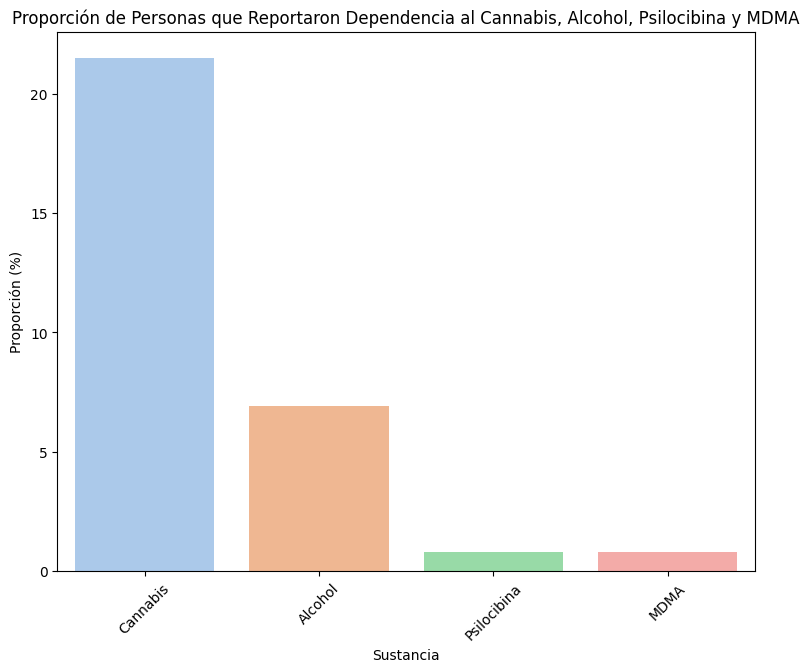

In [233]:
plt.figure(figsize=(9, 7))
sns.barplot(data=df_dependencia.sort_values(by='Porcentaje de Dependencia', ascending=False), x='Sustancia', y='Porcentaje de Dependencia', palette='pastel')

plt.title('Proporción de Personas que Reportaron Dependencia al Cannabis, Alcohol, Psilocibina y MDMA')
plt.xticks(rotation=45)
plt.xlabel('Sustancia')
plt.ylabel('Proporción (%)')

plt.show()

#### Distribución de sustancias comúnmente utilizadas en tratamientos terapéuticos


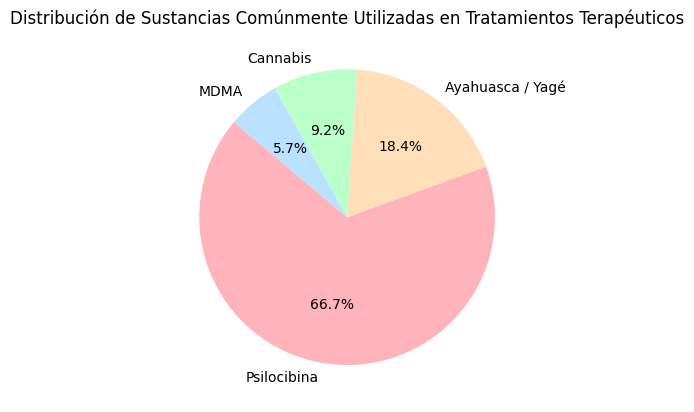

In [234]:
# Lista de las sustancias mas utilizadas por los participantes en tratamientos terapeuticos
sustancias_tratamiento_frecuente = ['Cannabis', 'MDMA', 'Psilocibina', 'Ayahuasca / Yagé']

# Crear DF con las sustancias que hagan parte de esta lista y contar los registros para cada una
df_filtrado_sustancia_tratamiento = df_clean[df_clean['Sustancia Tratamiento'].isin(sustancias_tratamiento_frecuente)]
sustancia_tratamiento_counts = df_filtrado_sustancia_tratamiento['Sustancia Tratamiento'].value_counts()


plt.pie(x=sustancia_tratamiento_counts, labels=sustancia_tratamiento_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribución de Sustancias Comúnmente Utilizadas en Tratamientos Terapéuticos')
plt.show()

#### Conteo del consumo de sustancias que los participantes reportan haber consumido una vez en la vida, y de sustancias que reportan consumir frecuentemente


In [235]:
# Consumo de sustancias que los participantes reportan haber consumido una vez en la vida
cols_sustancias_vida = [col for col in df_clean.columns if 'Sustancias Vida' in col]

# Consumo de sustancias que los participantes reportan consumir frecuentemente
cols_sustancias_frecuente = [col for col in df_clean.columns if 'Sustancias Frecuente' in col]

sustancias = []
conteo_vida = []
conteo_frecuente = []

# Recorrer las columnas de 'sustancias vida' y 'sustancias frecuente' en paralelo
for col_vida, col_freq in zip(cols_sustancias_vida, cols_sustancias_frecuente):
    # Reemplazar el nombre de la sustancia
    sustancia = col_vida.split('_')[1]
    # Sumar el total de registros por sustancia, tanto en consumo en la vida como en consumo frecuente
    vida_count = df_clean[df_clean[col_vida] == 1][col_vida].count()
    frecuente_count = df_clean[df_clean[col_freq] == 1][col_freq].count()
    # Agregar los resultados a su respectiva lista
    sustancias.append(sustancia)
    conteo_vida.append(vida_count)
    conteo_frecuente.append(frecuente_count)

# Crear un nuevo df combinando las listas
df_combined_sustancias = pd.DataFrame({
    'Sustancia': sustancias, 
    'Conteo Consumo Vida': conteo_vida,
    'Conteo Consumo Frecuente': conteo_frecuente
})

print("""DataFrame con:
- Sustancia consumida 
- Cantidad de personas que reportaron consumir la sustancia una vez en la vida 
- Cantidad de personas que reportaron consumir la sustancia frecuentemente""")
df_combined_sustancias.sort_values(by='Conteo Consumo Vida', ascending=False)


DataFrame con:
- Sustancia consumida 
- Cantidad de personas que reportaron consumir la sustancia una vez en la vida 
- Cantidad de personas que reportaron consumir la sustancia frecuentemente


,Sustancia,Conteo Consumo Vida,Conteo Consumo Frecuente
1,Alcohol,252,125
2,Cannabis,239,159
9,Nicotina,194,53
11,Popper,144,14
6,LSD,139,15
5,Psilocibina,137,34
7,MDMA,117,19
3,Cocaína,100,10
0,2CB / Tussi,88,8
10,Otros,48,4


#### Distribución de las sustancias que se consumen frecuentemente y una vez en la vida


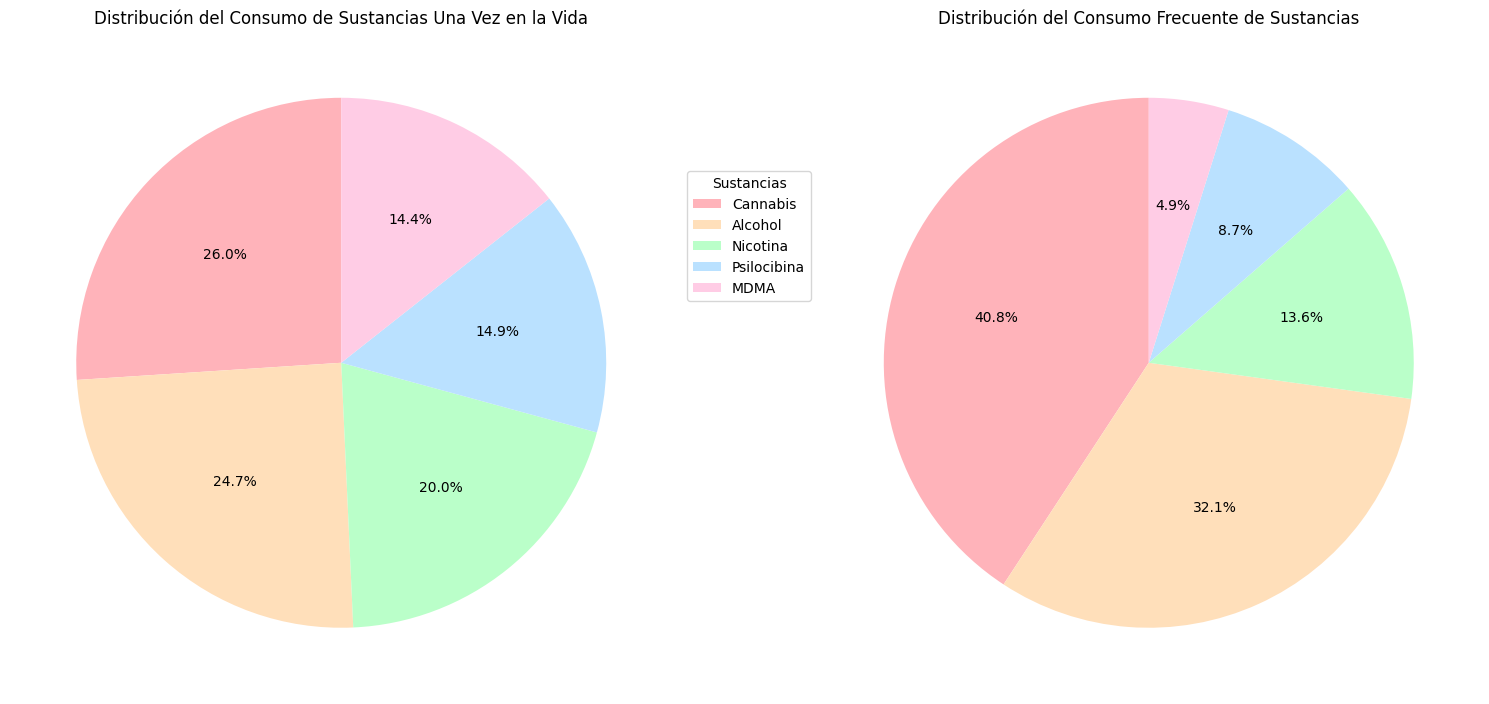

In [236]:
plt.figure(figsize=(15, 20))  

# Consumo una vez en la vida
plt.subplot(1, 2, 1)
wedges, texts, autotexts = plt.pie(
    df_combined_sustancias.sort_values(by='Conteo Consumo Vida', ascending=False).head(5)['Conteo Consumo Vida'],
    autopct='%1.1f%%',
    startangle=90,
    colors=colors
)
plt.title('Distribución del Consumo de Sustancias Una Vez en la Vida')

# Consumo frecuente
plt.subplot(1, 2, 2)
wedges, texts, autotexts = plt.pie(
    df_combined_sustancias.sort_values(by='Conteo Consumo Frecuente', ascending=False).head(5)['Conteo Consumo Frecuente'],
    autopct='%1.1f%%',
    startangle=90,
    colors=colors
)
plt.title('Distribución del Consumo Frecuente de Sustancias')

plt.legend(wedges, df_combined_sustancias.sort_values(by='Conteo Consumo Frecuente', ascending=False).head(5)['Sustancia'], title="Sustancias", loc="upper right", bbox_to_anchor=(0, 0.8))

plt.tight_layout()
plt.show()


#### Conteo de personas que reportaron tener una condición o historial familiar del estudio


In [237]:
# Proporcion de personas que reportan tener las condiciones medicas del estudio
columnas = df_clean.columns
cols_condicion_medica, cols_historial_familiar = [], []

for columna in columnas:
    if 'Condición_' in columna:
        cols_condicion_medica.append(columna)
    elif 'Historial Familiar_' in columna:
        cols_historial_familiar.append(columna)


conteo_condicion, conteo_historial, condiciones = [], [], []


max_length = max(len(cols_condicion_medica), len(cols_historial_familiar))

for i in range(len(cols_historial_familiar)):
    col_historial = cols_historial_familiar[i]
    col_historial_comparacion = 'Condición_' + col_historial.split('_')[1] 
    if col_historial_comparacion in cols_condicion_medica:
        historial_count = df_clean[df_clean[col_historial] == True][col_historial].count()
        conteo_historial.append(historial_count)

# Recorrer las columnas de condición médica y de historial familiar
for j in range(len(cols_condicion_medica)):
    col_condicion = cols_condicion_medica[j]
    condicion_count = df_clean[df_clean[col_condicion] == True][col_condicion].count()
    conteo_condicion.append(condicion_count)
    condiciones.append(cols_condicion_medica[j].split('_')[1])



df_combined_condicion_historial = pd.DataFrame({
    'Condición Medica': condiciones, 
    'Participante Presenta Condición': conteo_condicion,
    'Familiar Presenta Condición': conteo_historial
})

print("""DataFrame con:
- Condición medica
- Cantidad de personas que reportaron tener la condición
- Cantidad de personas que reportaron tener un familiar con la condición """)
df_combined_condicion_historial


DataFrame con:
- Condición medica
- Cantidad de personas que reportaron tener la condición
- Cantidad de personas que reportaron tener un familiar con la condición 


,Condición Medica,Participante Presenta Condición,Familiar Presenta Condición
0,Adicción Juegos o Apuestas,1,32
1,Adicción Nicotina,31,82
2,Adicción Sustancias Sintenticas o Drogas Ilegales,25,39
3,Adicción Medicamentos Recetados,5,11
4,Adicción Alcohol,18,114
5,Epilepsia,3,18
6,Esquizofrenia,2,22
7,Sin Condición Relevante,109,55
8,Otros,16,17
9,Sin Dato,24,10


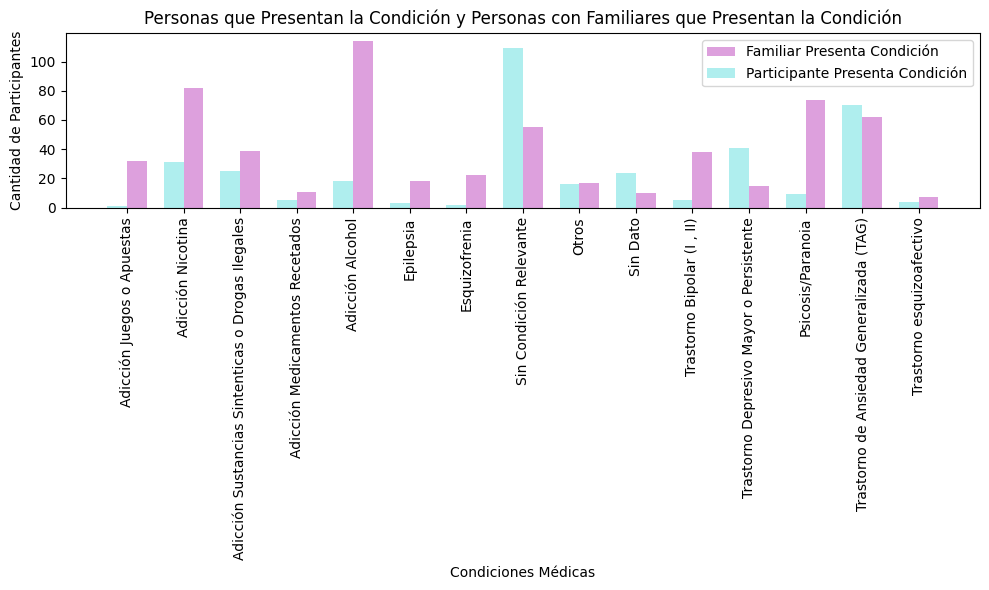

In [238]:
condiciones = df_combined_condicion_historial['Condición Medica']
conteo_condicion = df_combined_condicion_historial['Participante Presenta Condición']
conteo_historial = df_combined_condicion_historial['Familiar Presenta Condición']

# Convertir los valores vacios a números
conteo_condicion = pd.to_numeric(conteo_condicion, errors='coerce')
conteo_historial = pd.to_numeric(conteo_historial, errors='coerce')

x = np.arange(len(condiciones))  
width = 0.35  
fig, ax = plt.subplots(figsize=(10, 6))

# "Familia Presenta Condición"
rects1 = ax.bar(x + width/2, conteo_historial, width, label='Familiar Presenta Condición', color='plum')
# "Participante Presenta Condición"
rects2 = ax.bar(x - width/2, conteo_condicion, width, label='Participante Presenta Condición', color='paleturquoise')


ax.set_xlabel('Condiciones Médicas')
ax.set_ylabel('Cantidad de Participantes')
ax.set_title('Personas que Presentan la Condición y Personas con Familiares que Presentan la Condición')
ax.set_xticks(x)
ax.set_xticklabels(condiciones, rotation=90)
ax.legend()

plt.tight_layout()

plt.show()


#### Proporción de personas que tienen una condicion genetica que tambien presenta una persona de su familia


In [239]:
posible_condicion_genetica, conteo_genetica = [], []

# Recorrer las columnas con las condiciones que presenta el participante y su familia
for col_condicion, col_historial in zip(cols_condicion_medica, cols_historial_familiar):
    genetica_count = df_clean[(df_clean[col_condicion] == True) & (df_clean[col_historial] == True)][col_condicion].count()
    conteo_genetica.append(genetica_count)

# Verificar que la longitud de conteo_genetica sea la misma que la de las filas en df_combined_condicion_historial
num_filas = len(df_combined_condicion_historial)

# Si conteo_genetica tiene menos elementos, rellenar con valores vacíos
if len(conteo_genetica) < num_filas:
    conteo_genetica.extend([''] * (num_filas - len(conteo_genetica)))

df_combined_condicion_historial['Participante Y Familiar Presenta Condición'] = conteo_genetica

print("""DataFrame con:
- Condición medica
- Cantidad de personas que reportaron tener la condición
- Cantidad de personas que reportaron tener un familiar con la condición
- Cantidad de personas que tienen la condición genetica al igual que algún miembro de su familia""")
df_combined_condicion_historial

DataFrame con:
- Condición medica
- Cantidad de personas que reportaron tener la condición
- Cantidad de personas que reportaron tener un familiar con la condición
- Cantidad de personas que tienen la condición genetica al igual que algún miembro de su familia


,Condición Medica,Participante Presenta Condición,Familiar Presenta Condición,Participante Y Familiar Presenta Condición
0,Adicción Juegos o Apuestas,1,32,1
1,Adicción Nicotina,31,82,23
2,Adicción Sustancias Sintenticas o Drogas Ilegales,25,39,14
3,Adicción Medicamentos Recetados,5,11,0
4,Adicción Alcohol,18,114,16
5,Epilepsia,3,18,0
6,Esquizofrenia,2,22,1
7,Sin Condición Relevante,109,55,9
8,Otros,16,17,2
9,Sin Dato,24,10,0


In [240]:
# Porcentaje de participantes que presentan la condición al igual que un miembro de su familia

porcentaje_genetica = []

# Recorrer las filas del DF y guardarlas en variables para calcular el porcentaje
for i in range(len(df_combined_condicion_historial)):
    col_condicion_genetica = df_combined_condicion_historial.loc[i, 'Participante Y Familiar Presenta Condición']
    col_condicion_participante = df_combined_condicion_historial.loc[i, 'Participante Presenta Condición']
    if col_condicion_genetica!= '' and col_condicion_participante!= '':
        porcentaje = round(((col_condicion_genetica / col_condicion_participante) * 100), 1)
        porcentaje_genetica.append(porcentaje)
    else:
        porcentaje_genetica.append('')


df_combined_condicion_historial['Porcentaje Posible Relación Genetica (%)'] = porcentaje_genetica
df_combined_condicion_historial.sort_values(by='Porcentaje Posible Relación Genetica (%)', ascending=False)

,Condición Medica,Participante Presenta Condición,Familiar Presenta Condición,Participante Y Familiar Presenta Condición,Porcentaje Posible Relación Genetica (%)
0,Adicción Juegos o Apuestas,1,32,1,100.0
4,Adicción Alcohol,18,114,16,88.9
14,Trastorno esquizoafectivo,4,7,3,75.0
1,Adicción Nicotina,31,82,23,74.2
2,Adicción Sustancias Sintenticas o Drogas Ilegales,25,39,14,56.0
6,Esquizofrenia,2,22,1,50.0
12,Psicosis/Paranoia,9,74,2,22.2
8,Otros,16,17,2,12.5
7,Sin Condición Relevante,109,55,9,8.3
11,Trastorno Depresivo Mayor o Persistente,41,15,2,4.9


##### Representación visual de las condiciones compartidas entre el participante y un miembro de su familia


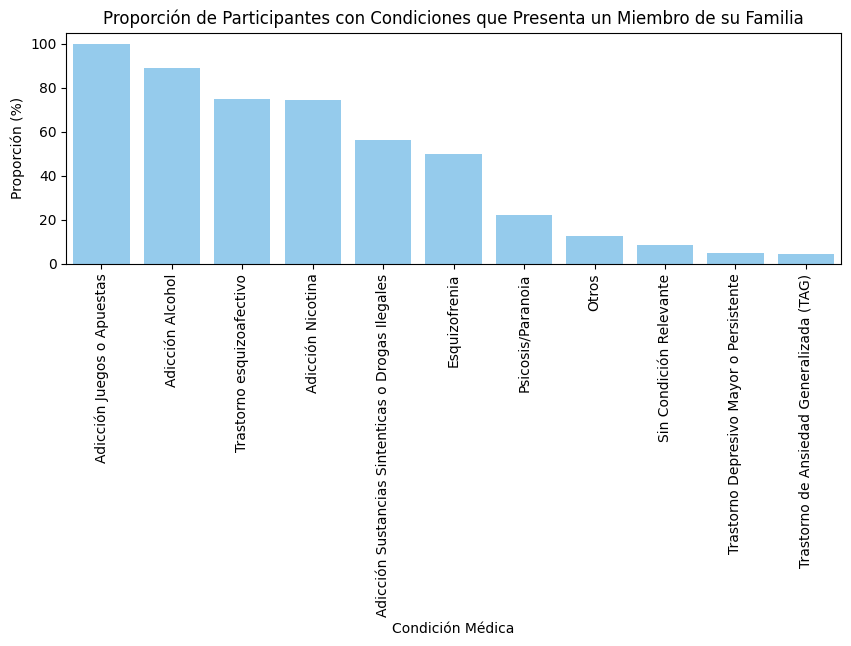

In [241]:
plt.figure(figsize=(10, 3))

sns.barplot(
    data=df_combined_condicion_historial.sort_values(by='Porcentaje Posible Relación Genetica (%)', ascending=False).head(11),
    x='Condición Medica',
    y='Porcentaje Posible Relación Genetica (%)',
    color='lightskyblue'
)

plt.title("Proporción de Participantes con Condiciones que Presenta un Miembro de su Familia")
plt.xlabel('Condición Médica')
plt.ylabel('Proporción (%)')

plt.xticks(rotation=90, ha='center')
plt.show()


#### Condiciones frecuentemente tratadas con SPA


In [242]:
razones_count = []
razones_nombres = []

for razon in razones_tratamiento:
    razon_clean = razon.split('_')[1]
    razones_nombres.append(razon_clean)
    count = df_clean[df_clean[razon] == True][razon].count()
    razones_count.append(count)

df_razon_tratamiento = pd.DataFrame({'Razón de Tratamiento': razones_nombres,
                                     'Frecuencia': razones_count})

df_razon_tratamiento = df_razon_tratamiento[~df_razon_tratamiento['Razón de Tratamiento'].isin(['Sin Dato', 'Otros', 'Sin Razón'])]
df_razon_tratamiento = df_razon_tratamiento.sort_values(by='Frecuencia', ascending=False)

print("""DataFrame con:
- Razón por la que se realizó un tratamiento con sustancias psicoactivas
- Frecuencia""")
df_razon_tratamiento



DataFrame con:
- Razón por la que se realizó un tratamiento con sustancias psicoactivas
- Frecuencia


,Razón de Tratamiento,Frecuencia
1,Ansiedad,49
2,Depresión,45
10,Trastorno de Déficit de Atención e Hiperactivi...,18
11,Trastornos del sueño,11
4,Estres Post Traumatico,11
0,Abuso de sustancias,10
3,Dolor fisico,7
9,Trastorno Obsesivo Compulsivo (TOC),6
8,Trastorno Bipolar,4


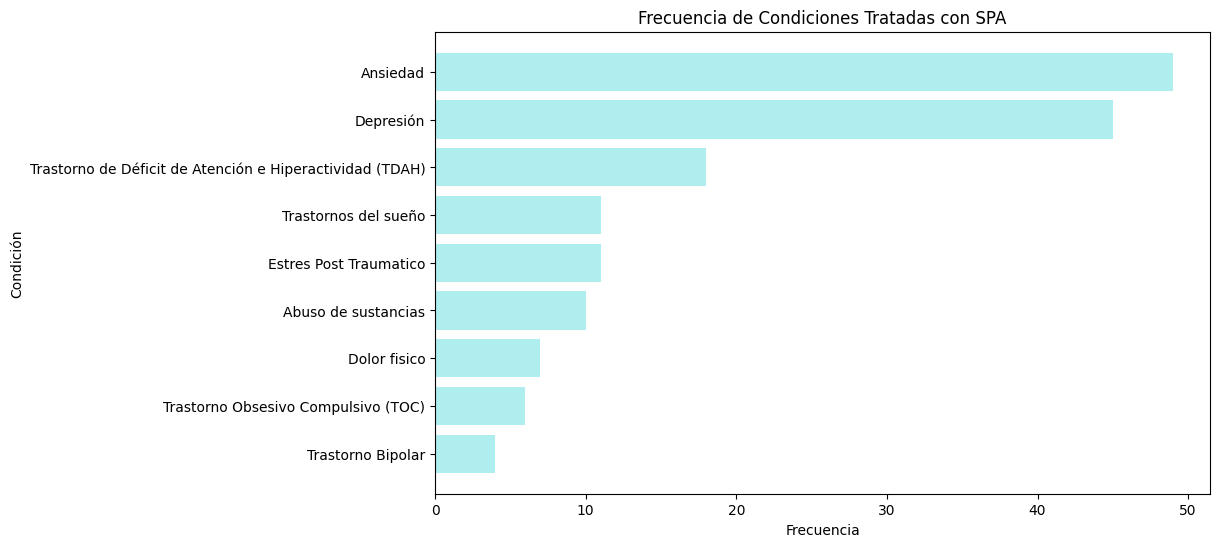

In [243]:
plt.figure(figsize=(10,6))
plt.barh(df_razon_tratamiento['Razón de Tratamiento'], df_razon_tratamiento['Frecuencia'], color='paleturquoise')
plt.ylabel('Condición')
plt.xlabel('Frecuencia')
plt.title('Frecuencia de Condiciones Tratadas con SPA')
plt.gca().invert_yaxis() 
plt.show()


#### Calificación de los tratamientos para las condiciones más frecuentes


In [244]:
calificaciones = {}

# Recorrer las condiciones tratadas con SPA en el df
for condicion in df_razon_tratamiento['Razón de Tratamiento']:
    condicion = 'Razón Tratamiento_' + condicion
    calificacion = df_clean[df_clean[condicion] == True]['Calificación Tratamiento']
    lista_calificaciones = calificacion.tolist()
    # Calcular el promedio de la calificación del tratamiento según los participantes que utilizaron SPA para tratar cada condición
    promedio = round((sum(lista_calificaciones) / len(lista_calificaciones)), 1)
    calificaciones[condicion] = promedio

calificaciones = list(calificaciones.values())

df_razon_tratamiento['Promedio de Calificación de Tratamiento'] = calificaciones

df_razon_tratamiento.replace({'Trastorno de Déficit de Atención e Hiperactividad (TDAH)': 'TDAH'}, inplace=True)
df_razon_tratamiento

,Razón de Tratamiento,Frecuencia,Promedio de Calificación de Tratamiento
1,Ansiedad,49,4.3
2,Depresión,45,4.4
10,TDAH,18,3.9
11,Trastornos del sueño,11,4.2
4,Estres Post Traumatico,11,4.9
0,Abuso de sustancias,10,4.0
3,Dolor fisico,7,4.4
9,Trastorno Obsesivo Compulsivo (TOC),6,3.8
8,Trastorno Bipolar,4,2.5


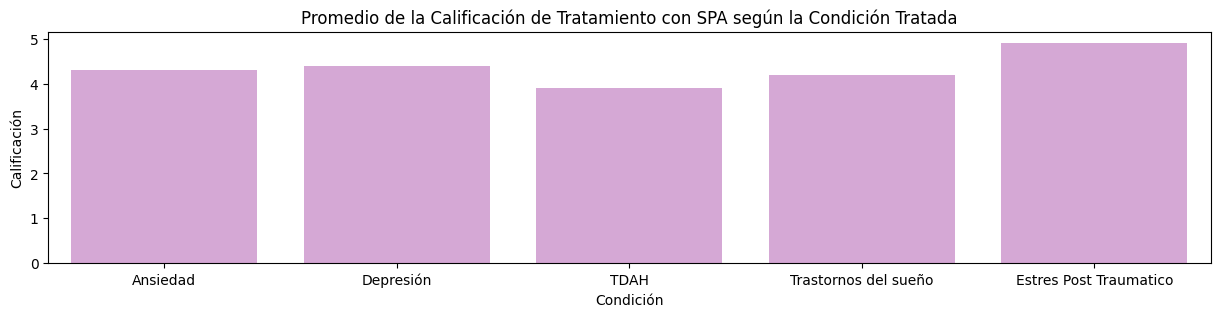

In [245]:
plt.figure(figsize=(15, 3))
sns.barplot(data=df_razon_tratamiento.head(5), x='Razón de Tratamiento', y='Promedio de Calificación de Tratamiento', color='plum')

plt.title('Promedio de la Calificación de Tratamiento con SPA según la Condición Tratada')
plt.ylabel('Calificación')
plt.xlabel('Condición')
plt.show()


#### Calificación del tratamiento según los usarios que han realizado tratamientos con las SPA del estudio


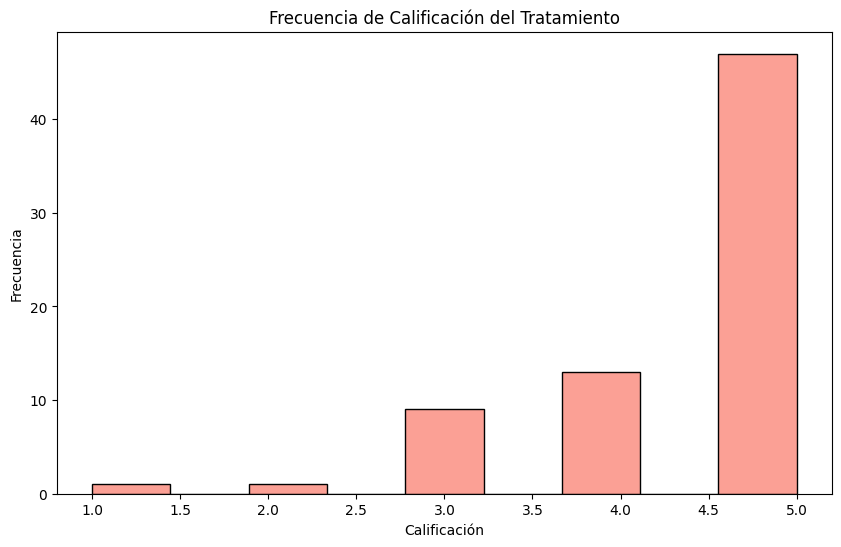

90.3% de las personas que han realizado tratamientos con SPA, lo califican entre 4 y 5


In [246]:
df_filtrado = df_clean[(df_clean['Calificación Tratamiento'] != 0) & (df_clean['Sustancia Tratamiento'].isin(sustancias_estudio))]

plt.figure(figsize=(10,6))
sns.histplot(data=df_filtrado, x='Calificación Tratamiento', color='salmon')

plt.title('Frecuencia de Calificación del Tratamiento')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')
plt.show()


df_tratamiento = df_clean[df_clean['Cantidad Tratamientos'] != 'Sin Dato']
resultado4o5 = df_tratamiento[df_tratamiento['Calificación Tratamiento'].isin([4, 5])]

porcentaje = (resultado4o5.shape[0] * df_tratamiento.shape[0]) / 100
print(f'{porcentaje}% de las personas que han realizado tratamientos con SPA, lo califican entre 4 y 5')

#### Calificación del tratamiento según la sustancia utilizada


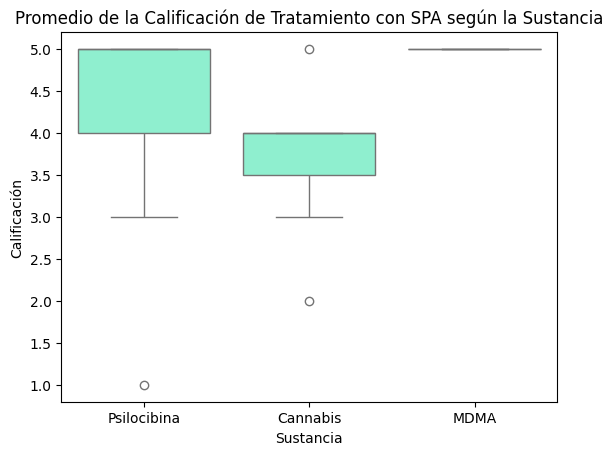

De un total de 5 personas que hicieron tratamiento con MDMA, 5 calificaron su tratamiento con un 5


In [247]:
df_filtrado_tratamiento = df_filtrado[df_filtrado['Cantidad Tratamientos'] != 'Sin Dato']
sns.boxplot(data=df_filtrado_tratamiento, x='Sustancia Tratamiento', y='Calificación Tratamiento', color='aquamarine')

plt.title("Promedio de la Calificación de Tratamiento con SPA según la Sustancia")
plt.xlabel("Sustancia")
plt.ylabel("Calificación")
plt.show()

# Calificación de los tratamientos realizados con MDMA
df_mdma5 = df_filtrado[(df_filtrado['Calificación Tratamiento'] == 5) & (df_filtrado['Sustancia Tratamiento'] == 'MDMA')]
df_mdma = df_filtrado[df_filtrado['Sustancia Tratamiento'] == 'MDMA']

print(f'De un total de {df_mdma.shape[0]} personas que hicieron tratamiento con MDMA, {df_mdma5.shape[0]} calificaron su tratamiento con un 5')


### Efectos Negativos y Positivos de las SPA


In [248]:
columnas = df_clean.columns

efectos_positivos, efectos_negativos = {}, {}

# Iterar sobre las columnas y clasificarlas según sean efectos positivos o negativos
for columna in columnas:
    # Extraer la sustancia y el efecto del nombre de la columna
    if 'Efectos Positivos' in columna and 'Sin Dato' not in columna and 'Otros' not in columna and 'Sin Efecto' not in columna:
        sustancia_efecto = columna.split('Positivos ')[1]
        sustancia = sustancia_efecto.split('_')[0]
        efecto = sustancia_efecto.split('_')[1]
        # Contar la frecuencia para cada efecto y agregarlo al diccionario
        efecto_count = df_clean[df_clean[columna] == True][columna].count()
        if sustancia not in efectos_positivos:
            efectos_positivos[sustancia] = {}
        efectos_positivos[sustancia][efecto] = efecto_count

    
    elif 'Efectos Negativos' in columna and 'Sin Dato' not in columna and 'Otros' not in columna and 'Sin Efecto' not in columna:
        sustancia_efecto = columna.split('Negativos ')[1]
        sustancia = sustancia_efecto.split('_')[0]
        efecto = sustancia_efecto.split('_')[1]
        efecto_count = df_clean[df_clean[columna] == True][columna].count()
        if sustancia not in efectos_negativos:
            efectos_negativos[sustancia] = {}
        efectos_negativos[sustancia][efecto] = efecto_count


In [249]:
# Convertir los diccionarios en un DF
df_efectos_positivos = pd.DataFrame([
    {'Sustancia': sustancia, 'Efecto Positivo': efecto, 'Frecuencia': count} 
    for sustancia, efectos in efectos_positivos.items()
    for efecto, count in efectos.items()
])

df_efectos_positivos.sort_values(by='Frecuencia', ascending=False)

,Sustancia,Efecto Positivo,Frecuencia
3,Cannabis,Mejora Sueño,123
4,Cannabis,Mejora Estado de Animo,119
10,Psilocibina,Mejora Introspección,117
5,Cannabis,Mejora Introspección,113
11,Psilocibina,Mayor Satisfacción con la Vida,106
2,Cannabis,Aumento Creatividad,87
1,Cannabis,Aumento Apetito,81
13,Psilocibina,Reducción Ansiedad,78
16,MDMA,Aumento Empatía,74
14,Psilocibina,Reducción Sintomas Depresión,70


In [250]:
df_efectos_negativos = pd.DataFrame([
    {'Sustancia': sustancia, 'Efecto Negativo': efecto, 'Frecuencia': count} 
    for sustancia, efectos in efectos_negativos.items() 
    for efecto, count in efectos.items()
])
df_efectos_negativos.sort_values(by='Frecuencia', ascending=False)

,Sustancia,Efecto Negativo,Frecuencia
3,Cannabis,Problemas Memoria o Atención,123
0,Cannabis,Aislamiento,58
5,Cannabis,Psicosis,47
11,MDMA,Cambios de humor,34
6,Cannabis,Trastornos del sueño,31
2,Cannabis,Problemas cognitivos,28
4,Cannabis,Problemas respiratorios,24
1,Cannabis,Falta Apetito,12
10,Psilocibina,Psicosis,11
9,Psilocibina,Problemas Memoria o Atención,7


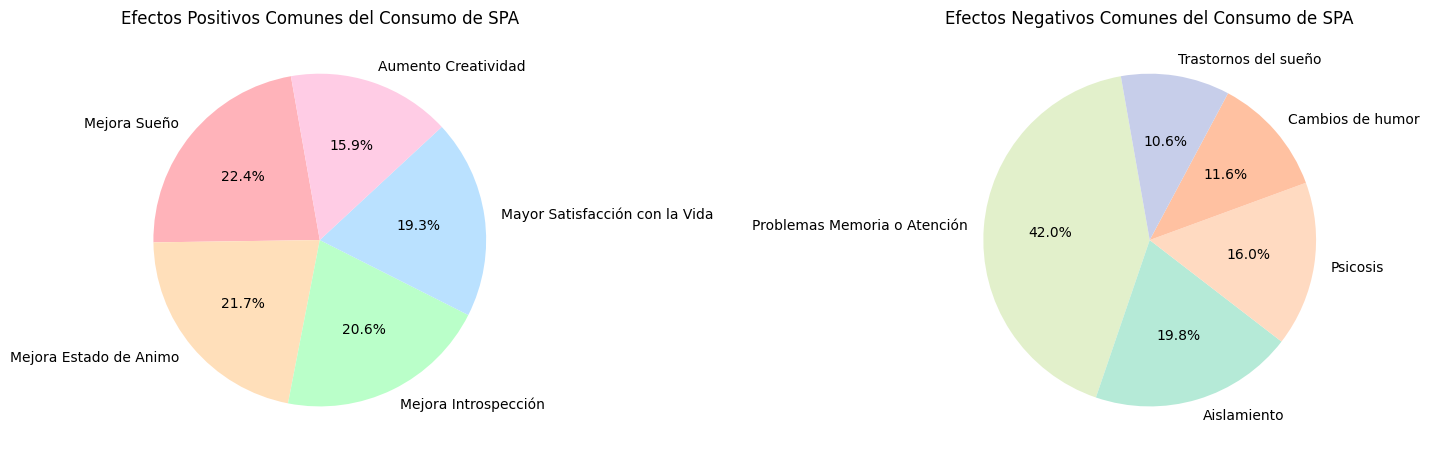

In [270]:
df_efectos_positivos = df_efectos_positivos.drop_duplicates(subset='Efecto Positivo')
top_efectos_positivos = df_efectos_positivos.sort_values('Frecuencia', ascending=False).head(5)

top_efectos_negativos = df_efectos_negativos.sort_values('Frecuencia', ascending=False).head(5)

plt.figure(figsize=(15, 20))

plt.subplot(1, 2, 1)
plt.pie(top_efectos_positivos['Frecuencia'], labels=top_efectos_positivos['Efecto Positivo'], autopct='%1.1f%%', startangle=100, colors=colors)
plt.title('Efectos Positivos Comunes del Consumo de SPA')

plt.subplot(1, 2, 2)
plt.pie(top_efectos_negativos['Frecuencia'], labels=top_efectos_negativos['Efecto Negativo'], autopct='%1.1f%%', startangle=100, colors=colors[::-1])
plt.title('Efectos Negativos Comunes del Consumo de SPA')

plt.subplots_adjust(wspace=3)
plt.tight_layout()
plt.show()


#### Correlación entre Condiciones que Presenta el Participante y Efectos Negativos de las SPA


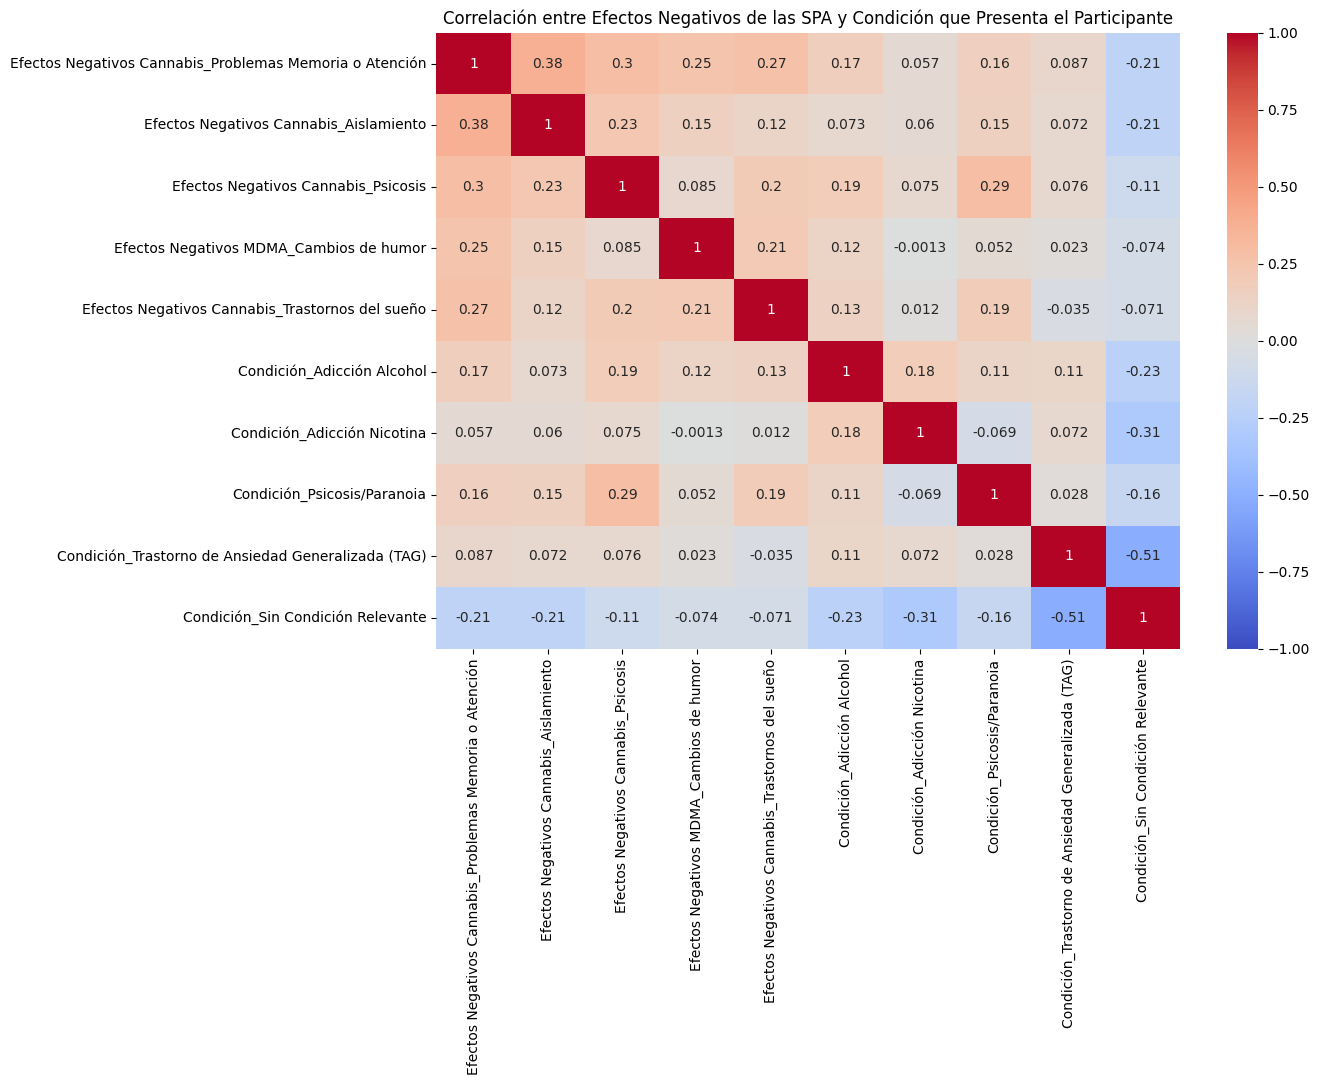

In [252]:
efectos_negativos_frecuentes = list(df_efectos_negativos.sort_values(by='Frecuencia', ascending=False)['Efecto Negativo'].head(5))
sustancias_efectos_negativos_frecuentes = list(df_efectos_negativos.sort_values(by='Frecuencia', ascending=False)['Sustancia'].head(5))

# Eliminar valores vacios en el DF
df_combined_condicion_historial_clean = df_combined_condicion_historial[df_combined_condicion_historial['Participante Presenta Condición'] != '']
condiciones_frecuentes = list(df_combined_condicion_historial_clean.sort_values(by='Familiar Presenta Condición', ascending=False)['Condición Medica'].head(5))

cols_correlacion = []

# Agregar los efectos negativos y las condiciones a la lista que se usará para la correlación
for efecto, sustancia in zip(efectos_negativos_frecuentes, sustancias_efectos_negativos_frecuentes):
    efecto = 'Efectos Negativos ' + sustancia + '_' + efecto
    cols_correlacion.append(efecto)

for i, condicion in enumerate(condiciones_frecuentes):
    condicion = 'Condición_' + condicion
    condiciones_frecuentes[i] = condicion

cols_correlacion.extend(condiciones_frecuentes)

# Graficar el mapa de calor
plt.figure(figsize=(12, 8))
plt.title('Correlación entre Efectos Negativos de las SPA y Condición que Presenta el Participante')
correlacion = df_clean[cols_correlacion].corr()
plt.xticks(rotation=45)

sns.heatmap(correlacion, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()


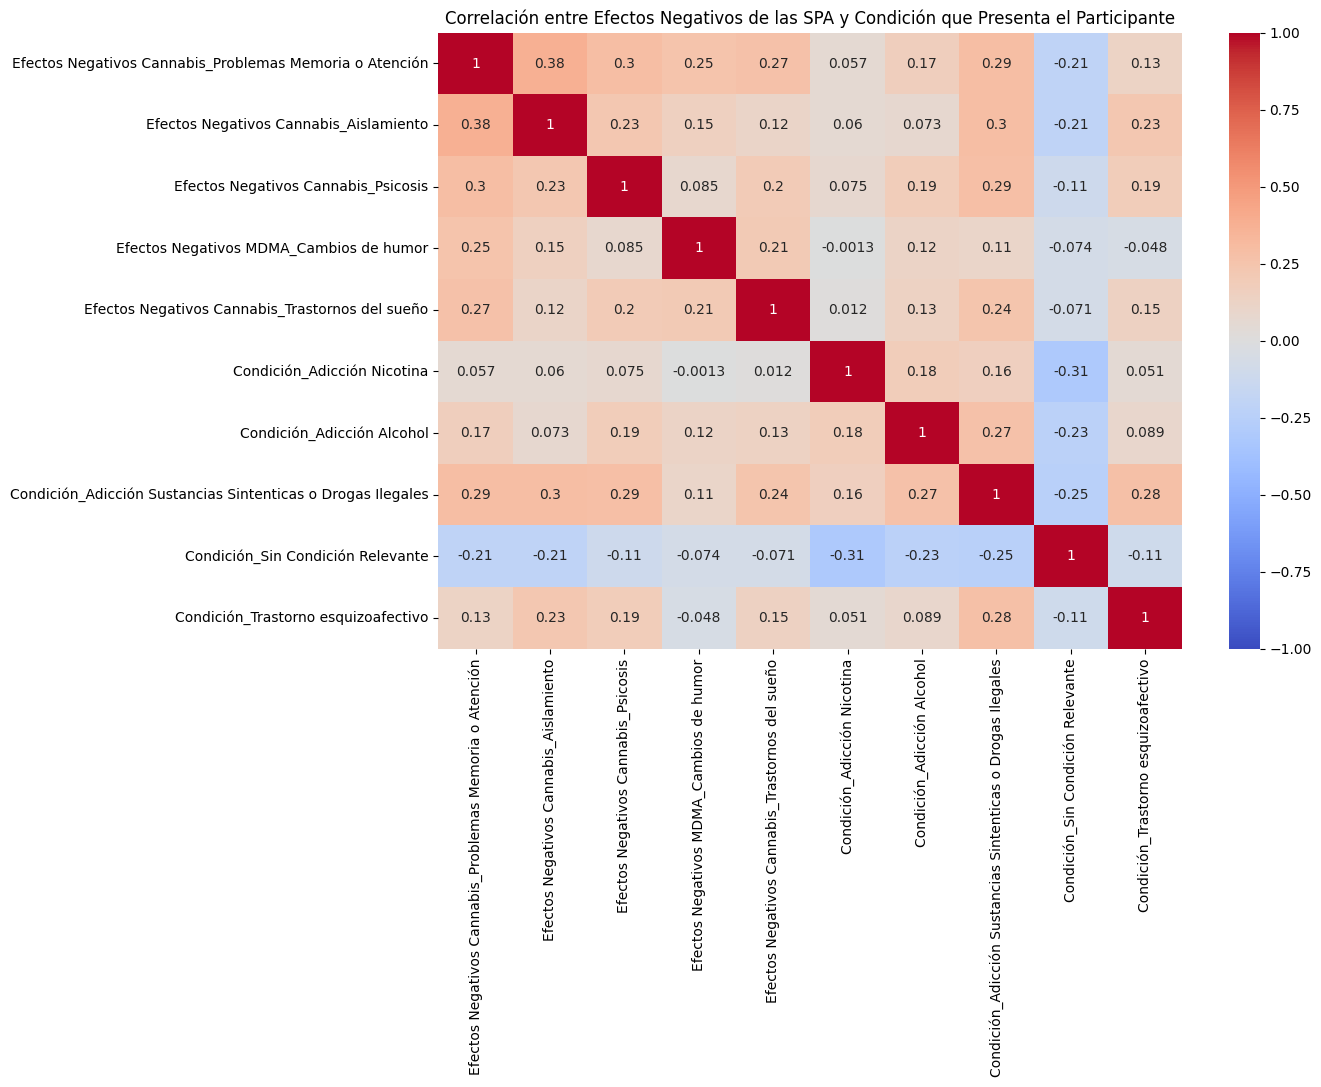

In [253]:
efectos_negativos_frecuentes = list(df_efectos_negativos.sort_values(by='Frecuencia', ascending=False)['Efecto Negativo'].head(5))
sustancias_efectos_negativos_frecuentes = list(df_efectos_negativos.sort_values(by='Frecuencia', ascending=False)['Sustancia'].head(5))

# Eliminar valores vacios en el DF
df_combined_condicion_historial_clean = df_combined_condicion_historial[df_combined_condicion_historial['Participante Presenta Condición'] != '']
condiciones_geneticas_frecuentes = list(df_combined_condicion_historial_clean.sort_values(by='Participante Y Familiar Presenta Condición', ascending=False)['Condición Medica'].head(5))

cols_correlacion = []

# Agregar los efectos negativos y las condiciones a la lista que se usará para la correlación
for efecto, sustancia in zip(efectos_negativos_frecuentes, sustancias_efectos_negativos_frecuentes):
    efecto = 'Efectos Negativos ' + sustancia + '_' + efecto
    cols_correlacion.append(efecto)

for i, condicion in enumerate(condiciones_geneticas_frecuentes):
    condicion = 'Condición_' + condicion
    condiciones_geneticas_frecuentes[i] = condicion

cols_correlacion.extend(condiciones_geneticas_frecuentes)

# Graficar el mapa de calor
plt.figure(figsize=(12, 8))
plt.title('Correlación entre Efectos Negativos de las SPA y Condición que Presenta el Participante')
correlacion = df_clean[cols_correlacion].corr()
plt.xticks(rotation=45)

sns.heatmap(correlacion, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()


#### Proporción de personas que reportaron experimentar dependencia al cannabis según la frecuencia de consumo


In [254]:
# Filtrar las personas que consumen cannabis
df_filtrado_cannabis = df_clean[df_clean['Frecuencia Cannabis'] != 'Sin Dato']


dependencias_cannabis = {}

for freq in orden_frecuencias:
    freq_dependencia = df_clean[(df_clean['Frecuencia Cannabis'] == freq) & (df_clean['Dependencia Cannabis'] == True)]
    proporcion = (freq_dependencia.shape[0] / df_filtrado_cannabis.shape[0]) * 100
    dependencias_cannabis[freq] = proporcion


print(f'{round(dependencias_cannabis["Diario"], 2)}% de los entrevistados que consumen cannabis todos los días reportan haber experimentado dependencia a la sustancia')

12.0% de los entrevistados que consumen cannabis todos los días reportan haber experimentado dependencia a la sustancia


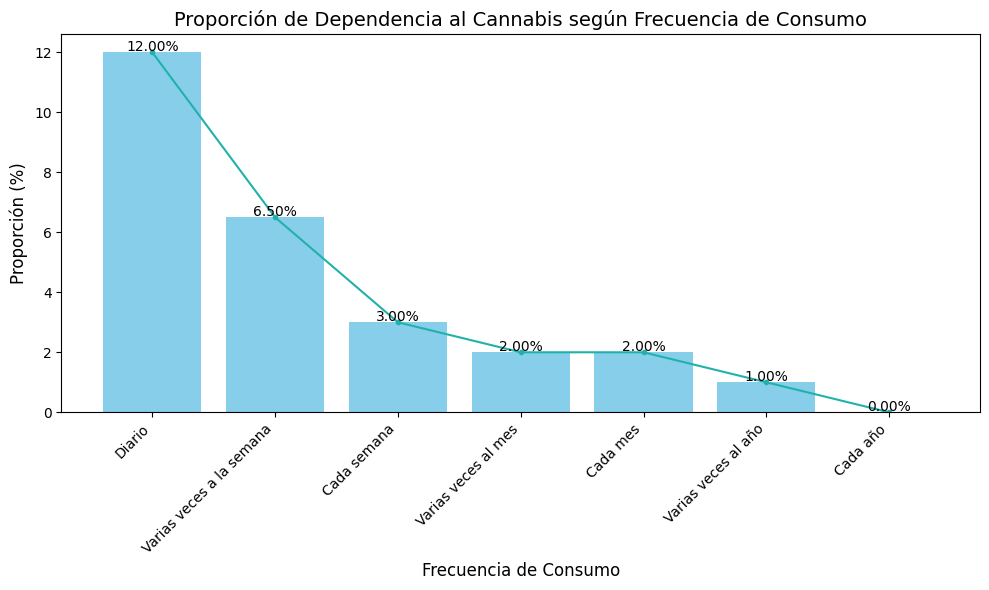

In [255]:
# Graficar la proporción de personas que reportaron dependencia al cannabis segun la frecuencia de consumo

frecuencia_consumo_cannabis = list(dependencias_cannabis.keys())
proporcion_dependencia_cannabis = list(dependencias_cannabis.values())

plt.figure(figsize=(10, 6))
plt.bar(frecuencia_consumo_cannabis, proporcion_dependencia_cannabis, color='skyblue')
plt.plot(frecuencia_consumo_cannabis, proporcion_dependencia_cannabis, color='lightseagreen', marker='.', linestyle='-')

plt.title('Proporción de Dependencia al Cannabis según Frecuencia de Consumo', fontsize=14)
plt.xlabel('Frecuencia de Consumo', fontsize=12)
plt.ylabel('Proporción (%)', fontsize=12)


for i, valor in enumerate(proporcion_dependencia_cannabis):
    plt.text(i, valor + 0.05, f'{valor:.2f}%', ha='center', fontsize=10)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### Proporción de dependencia y abuso de la psilocibina


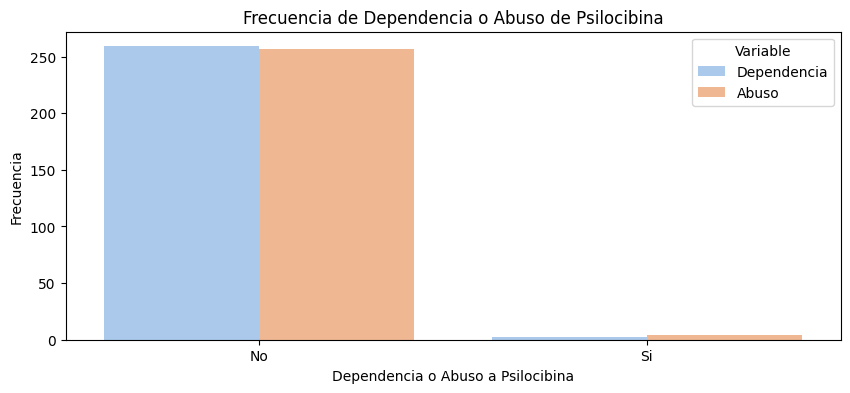

El 98.55% de los participantes reportaron nunca haber experimentado dependencia a la psilocibina


In [257]:
dependencia_counts = df_clean['Dependencia Psilocibina'].value_counts()
abuso_counts = df_clean['Abuso Psilocibina'].value_counts()

df_counts = pd.DataFrame({
    'Dependencia': dependencia_counts,
    'Abuso': abuso_counts
}).reset_index().melt(id_vars='index', var_name='Variable', value_name='Cantidad')

# Renombrar la columna de valores True/False para mayor claridad
df_counts['index'] = df_counts['index'].replace({True: 'Si', False: 'No'})


plt.figure(figsize=(10, 4))
sns.barplot(x='index', y='Cantidad', hue='Variable', data=df_counts, palette='pastel')

plt.xlabel('Dependencia o Abuso a Psilocibina')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Dependencia o Abuso de Psilocibina')

plt.show()


false_dependencia = df_clean[((df_clean['Sustancias Vida_Psilocibina'] == True) | (df_clean['Sustancias Frecuente_Psilocibina'] == True)) &(df_clean['Dependencia Psilocibina'] == False)].shape[0]
total_respuestas = df_clean[(df_clean['Sustancias Vida_Psilocibina'] == True) | (df_clean['Sustancias Frecuente_Psilocibina'] == True)]['Dependencia Psilocibina'].isin([True, False]).sum()
porcentaje_false = (false_dependencia / total_respuestas) * 100

print(f"El {porcentaje_false:.2f}% de los participantes reportaron nunca haber experimentado dependencia a la psilocibina")



#### Personas que experimentaron psicosis por consumo de cannabis


In [258]:
df_psicosis_cannabis = df_clean[(df_clean['Efectos Negativos Cannabis_Psicosis'] == True) & (df_clean['Frecuencia Cannabis'] != 'Sin Dato')]

psicosis_cannabis = {}

for freq in orden_frecuencias:
    freq_psicosis = df_clean[(df_clean['Frecuencia Cannabis'] == freq) & (df_clean['Efectos Negativos Cannabis_Psicosis'] == True)]
    proporcion = (freq_psicosis.shape[0] * df_filtrado_cannabis.shape[0]) / 100
    psicosis_cannabis[freq] = proporcion

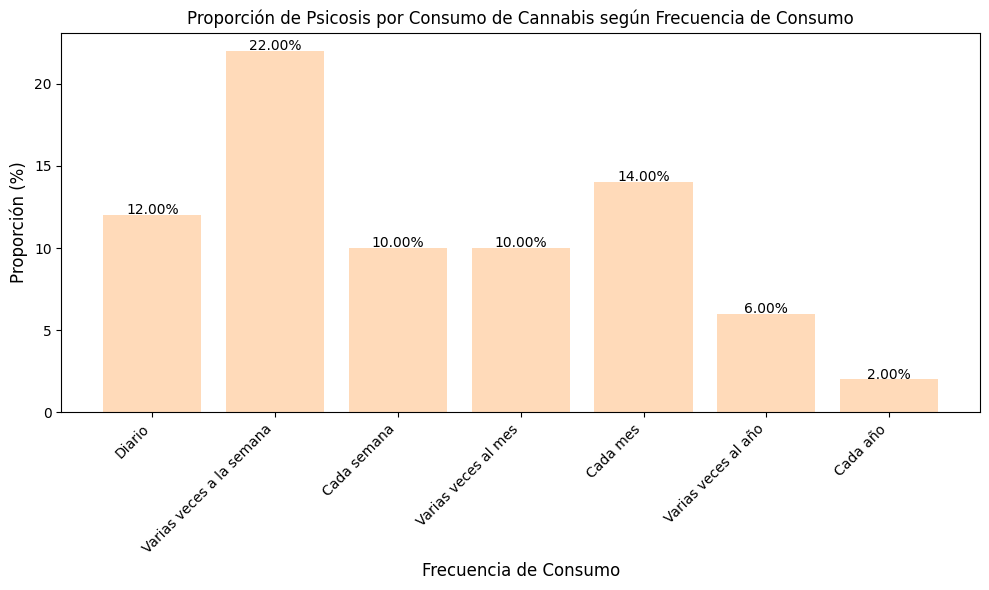

In [259]:
# Graficar la proporción de personas que reportaron psicosis segun la frecuencia de consumo

frecuencia_consumo_cannabis = list(psicosis_cannabis.keys())
proporcion_psicosis_cannabis = list(psicosis_cannabis.values())

plt.figure(figsize=(10, 6))
plt.bar(frecuencia_consumo_cannabis, proporcion_psicosis_cannabis, color='peachpuff')

plt.title('Proporción de Psicosis por Consumo de Cannabis según Frecuencia de Consumo')
plt.xlabel('Frecuencia de Consumo', fontsize=12)
plt.ylabel('Proporción (%)', fontsize=12)


for i, valor in enumerate(proporcion_psicosis_cannabis):
    plt.text(i, valor + 0.05, f'{valor:.2f}%', ha='center', fontsize=10)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### Calificación de tratamiento según las variables mas influyentes


In [260]:
df_calificacion = pd.DataFrame({
    'Calificación': df_clean['Calificación Tratamiento'],
    'Cantidad Tratamientos': df_clean['Cantidad Tratamientos'],
    'Tipo Dosis': df_clean['Tipo de Dosis'],
    'Razón: Ansiedad': df_clean['Razón Tratamiento_Ansiedad'],
    'Razón: Depresión': df_clean['Razón Tratamiento_Depresión'],
    'Sesiones Macrodosis': df_clean['Sesiones Macrodosis'],
    'Duración Microdosis': df_clean['Duración Microdosis'],
})

df_calificacion.dropna()
df_calificacion.sort_values(by='Calificación', ascending=False)
df_calificacion.head(5)

,Calificación,Cantidad Tratamientos,Tipo Dosis,Razón: Ansiedad,Razón: Depresión,Sesiones Macrodosis,Duración Microdosis
0,4.0,Más de tres,Macrodosis,False,False,Una sesión de un día,Sin Dato
1,5.0,Más de tres,Macrodosis,True,True,Más de 10 sesiones de un día,Sin Dato
2,5.0,Sin Dato,Microdosis,True,True,Sin Dato,Otros
3,3.0,Más de tres,Macrodosis,True,True,Una sesión de un día,1-3 meses
4,5.0,Más de tres,Macrodosis,False,True,Una sesión de un día,Sin Dato


In [261]:
# Generar un DF codificado sin incluir los valores 'Sin Dato'
df_calificacion_encoded = pd.DataFrame({
    'Calificación': df_encoded[df_encoded['Calificación Tratamiento'] != 0]['Calificación Tratamiento'],
    'Cantidad Tratamientos': df_encoded[df_encoded['Cantidad Tratamientos'] != 0]['Cantidad Tratamientos'],
    'Microdosis': df_encoded['Tipo de Dosis_Microdosis'],
    'Macrodosis': df_encoded['Tipo de Dosis_Macrodosis'],
    'Razón: Ansiedad': df_encoded['Razón Tratamiento_Ansiedad'],
    'Razón: Depresión': df_encoded['Razón Tratamiento_Depresión'],
    'Sesiones Macrodosis': df_encoded[~df_encoded['Sesiones Macrodosis'].isin([0, 4])]['Sesiones Macrodosis'],
    'Duración Microdosis': df_encoded[~df_encoded['Duración Microdosis'].isin([0, 4])]['Duración Microdosis'],
})

#### Calificación de tratamiento según la cantidad de tratamientos realizados


/var/folders/h9/bqqwl8l10jb5klwskmyw_0r40000gn/T/ipykernel_69483/284829301.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_filtrado_cantidad, x='Calificación', y='Cantidad Tratamientos', palette=colors)
/var/folders/h9/bqqwl8l10jb5klwskmyw_0r40000gn/T/ipykernel_69483/284829301.py:5: UserWarning: The palette list has more values (11) than needed (3), which may not be intended.
  sns.barplot(data=df_filtrado_cantidad, x='Calificación', y='Cantidad Tratamientos', palette=colors)


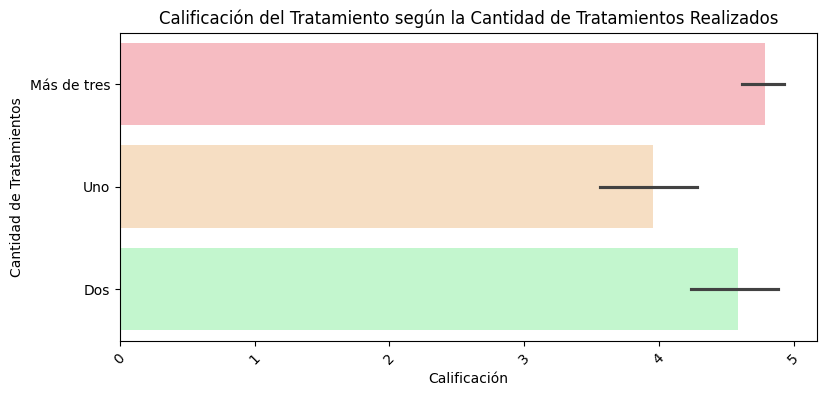

In [262]:
df_filtrado_cantidad = df_calificacion[(df_calificacion['Cantidad Tratamientos'] != 'Sin Dato') & (df_calificacion['Calificación'] != 'Sin Dato')]

# Gráfico de barra
plt.figure(figsize=(9, 4))
sns.barplot(data=df_filtrado_cantidad, x='Calificación', y='Cantidad Tratamientos', palette=colors)
plt.xlabel('Calificación')
plt.ylabel('Cantidad de Tratamientos')
plt.title('Calificación del Tratamiento según la Cantidad de Tratamientos Realizados')
plt.xticks(rotation=45)
plt.show()


#### Calificación de tratamiento según sesiones de macrodosis


/var/folders/h9/bqqwl8l10jb5klwskmyw_0r40000gn/T/ipykernel_69483/1364659148.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_filtrado_cantidad, x='Calificación', y='Sesiones Macrodosis', palette=colors)
/var/folders/h9/bqqwl8l10jb5klwskmyw_0r40000gn/T/ipykernel_69483/1364659148.py:5: UserWarning: The palette list has more values (11) than needed (3), which may not be intended.
  sns.barplot(data=df_filtrado_cantidad, x='Calificación', y='Sesiones Macrodosis', palette=colors)


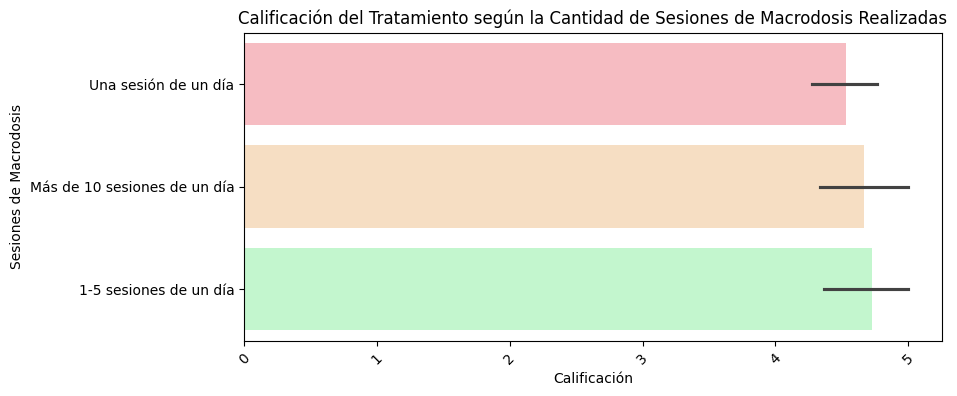

In [263]:
df_filtrado_cantidad = df_calificacion[(~df_calificacion['Sesiones Macrodosis'].isin(['Sin Dato', 'Otros'])) & (df_calificacion['Calificación'] != 'Sin Dato')]

# Gráfico de barras
plt.figure(figsize=(9, 4))
sns.barplot(data=df_filtrado_cantidad, x='Calificación', y='Sesiones Macrodosis', palette=colors)
plt.xlabel('Calificación')
plt.ylabel('Sesiones de Macrodosis')
plt.title('Calificación del Tratamiento según la Cantidad de Sesiones de Macrodosis Realizadas')
plt.xticks(rotation=45)
plt.show()


#### Calificación de tratamiento según tipo de dosis


/var/folders/h9/bqqwl8l10jb5klwskmyw_0r40000gn/T/ipykernel_69483/844097974.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtrado_tipo_dosis, x='Tipo Dosis', y='Calificación', palette=colors)
/var/folders/h9/bqqwl8l10jb5klwskmyw_0r40000gn/T/ipykernel_69483/844097974.py:5: UserWarning: The palette list has more values (11) than needed (2), which may not be intended.
  sns.boxplot(data=df_filtrado_tipo_dosis, x='Tipo Dosis', y='Calificación', palette=colors)


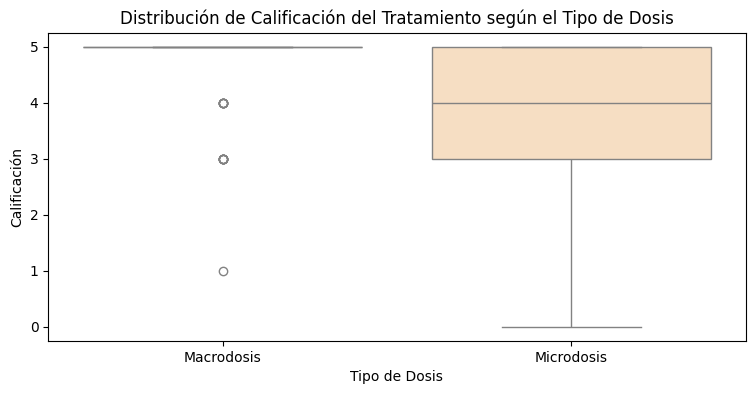

In [264]:
df_filtrado_tipo_dosis = df_calificacion[(df_calificacion['Tipo Dosis'].isin(['Macrodosis', 'Microdosis'])) & 
                                         (df_calificacion['Calificación'] != 'Sin Dato')]

plt.figure(figsize=(9, 4))
sns.boxplot(data=df_filtrado_tipo_dosis, x='Tipo Dosis', y='Calificación', palette=colors)
plt.xlabel('Tipo de Dosis')
plt.ylabel('Calificación')
plt.title('Distribución de Calificación del Tratamiento según el Tipo de Dosis')
plt.show()


In [265]:
total_macro = df_calificacion[(df_calificacion['Tipo Dosis'] == 'Macrodosis')]['Tipo Dosis'].count()
macro5 = df_calificacion[(df_calificacion['Tipo Dosis'] == 'Macrodosis') & (df_calificacion['Calificación'].isin([4, 5]))]['Tipo Dosis'].count()
porcentaje = round((macro5 / total_macro) * 100, 1)

print(f'El {porcentaje}% de personas que realizaron un tratamiento con macrodosis calificaron su tratamiento con un 5')

El 86.2% de personas que realizaron un tratamiento con macrodosis calificaron su tratamiento con un 5


#### Calificación de tratamiento según sesiones de macrodosis realizadas


/var/folders/h9/bqqwl8l10jb5klwskmyw_0r40000gn/T/ipykernel_69483/2124305191.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_filtrado_macrodosis, x='Calificación', y='Sesiones Macrodosis', palette=colors)
/var/folders/h9/bqqwl8l10jb5klwskmyw_0r40000gn/T/ipykernel_69483/2124305191.py:5: UserWarning: The palette list has more values (11) than needed (3), which may not be intended.
  sns.barplot(data=df_filtrado_macrodosis, x='Calificación', y='Sesiones Macrodosis', palette=colors)


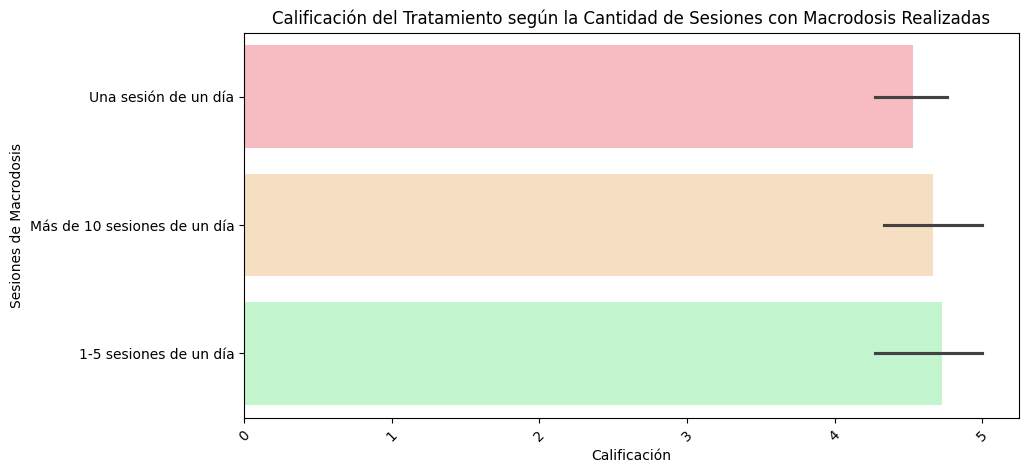

In [266]:
df_filtrado_macrodosis = df_calificacion[~df_calificacion['Sesiones Macrodosis'].isin(['Otros', 'Sin Dato'])]

# Gráfico de barras
plt.figure(figsize=(10, 5))
sns.barplot(data=df_filtrado_macrodosis, x='Calificación', y='Sesiones Macrodosis', palette=colors)
plt.xlabel('Calificación')
plt.ylabel('Sesiones de Macrodosis')
plt.title('Calificación del Tratamiento según la Cantidad de Sesiones con Macrodosis Realizadas')
plt.xticks(rotation=45)
plt.show()

/var/folders/h9/bqqwl8l10jb5klwskmyw_0r40000gn/T/ipykernel_69483/3267009921.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_filtrado_microdosis, x='Calificación', y='Duración Microdosis', palette=colors)
/var/folders/h9/bqqwl8l10jb5klwskmyw_0r40000gn/T/ipykernel_69483/3267009921.py:4: UserWarning: The palette list has more values (11) than needed (3), which may not be intended.
  sns.barplot(data=df_filtrado_microdosis, x='Calificación', y='Duración Microdosis', palette=colors)


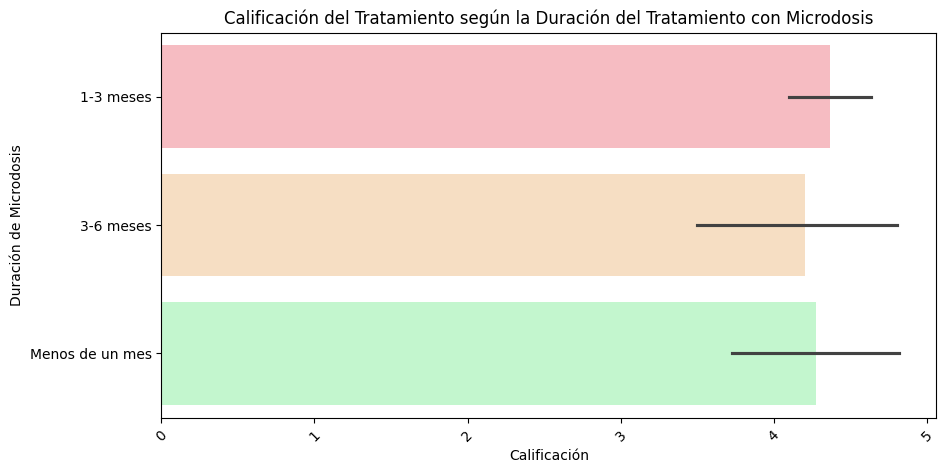

In [267]:
df_filtrado_microdosis = df_calificacion[~df_calificacion['Duración Microdosis'].isin(['Otros', 'Sin Dato'])]

plt.figure(figsize=(10, 5))
sns.barplot(data=df_filtrado_microdosis, x='Calificación', y='Duración Microdosis', palette=colors)
plt.xlabel('Calificación')
plt.ylabel('Duración de Microdosis')
plt.title('Calificación del Tratamiento según la Duración del Tratamiento con Microdosis')
plt.xticks(rotation=45)
plt.show()

#### Correlación entre variables significativas para la calificación del tratamiento


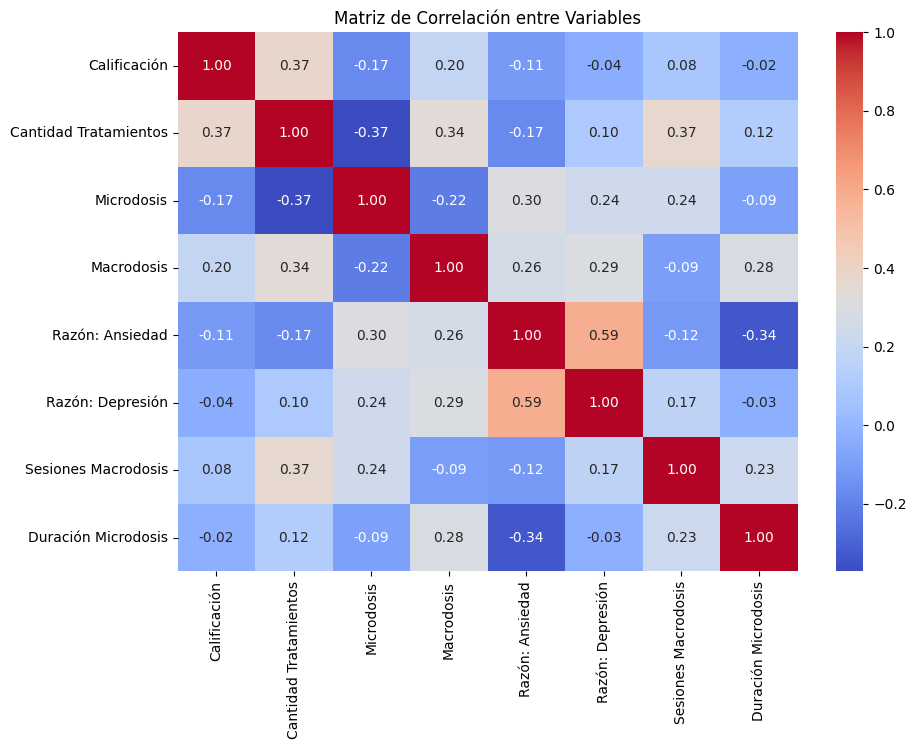

In [268]:
corr = df_calificacion_encoded.corr()

plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación entre Variables')
plt.show()

